In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import WeibullAFTFitter, LogLogisticAFTFitter, ExponentialFitter
import seaborn as sns
import os


# Create output directory for figures if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Set visualization style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

#  Load and Explore Data

In [106]:
# Load the dataset
df = pd.read_csv('Churn_Data_cleaned.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
display(df.head())

# Check for missing values in key columns
print("\nMissing values in key columns:")
display(df[['churn', 'months']].isnull().sum())

# Basic statistics of key variables
print("\nBasic statistics of key variables:")
display(df[['churn', 'months', 'totmrc_Mean', 'mou_Mean', 'rev_Mean', 'ovrmou_Mean']].describe())

Dataset shape: (93893, 108)


rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25        22.50   0.2475          0.0          0.0   
1   16.9900     10.25        16.99   0.0000          0.0          0.0   
2   38.0000      7.50        38.00   0.0000          0.0          0.0   
3   55.2300    570.50        71.98   0.0000          0.0          0.0   
4   82.2750   1312.25        75.00   1.2375          0.0          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  drop_vce_Mean  \
0          0.0          0.0        0.0     -157.25    -18.9975       0.666667   
1          0.0          0.0        0.0       -4.25      0.0000       0.333333   
2          0.0          0.0        0.0       -1.50      0.0000       0.000000   
3          0.0          0.0        0.0       38.50      0.0000       9.666667   
4          0.0          0.0        0.0      156.75      8.1450      52.000000   

   drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
0          False       0.666667          False       6.333333          False   
1          False       0.000000          False       2.666667          False   
2          False       0.000000          False       0.000000          False   
3          False       0.666667          False      77.000000          False   
4          False       7.666667          False      76.000000          False   

   recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  comp_dat_Mean  custcare_Mean  \
0      42.333333          False      45.000000            0.0       0.000000   
1       0.333333          False       6.000000            0.0       0.000000   
2       1.333333          False       3.666667            0.0       0.000000   
3      94.666667          False     137.000000            0.0       8.666667   
4     365.000000          False     577.333333            0.0       4.333333   

   ccrndmou_Mean  cc_mou_Mean  inonemin_Mean  threeway_Mean  mou_cvce_Mean  \
0            0.0     0.000000      18.000000       0.000000      90.643333   
1            0.0     0.000000       0.333333       0.000000       5.426667   
2            0.0     0.000000       1.333333       0.000000       8.410000   
3           15.0    11.076667      66.000000       0.000000     285.233333   
4           11.0     7.753333     301.666667       1.333333     369.536667   

   mou_cdat_Mean  mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
0            0.0      97.176667         0.000000         0.000000   
1            0.0       0.000000         0.000000         0.000000   
2            0.0       0.413333         0.333333         0.256667   
3            0.0     106.330000        14.666667        10.816667   
4            0.0     200.320000       370.333333       243.213333   

   iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  peak_dat_Mean  \
0         0.000000         0.000000      58.000000          False   
1         0.000000         0.000000       5.000000          False   
2         0.000000         0.000000       1.333333          False   
3         0.666667         0.366667      97.333333          False   
4       147.000000        85.146667     555.666667          False   

   mou_peav_Mean  mou_pead_Mean  opk_vce_Mean  opk_dat_Mean  mou_opkv_Mean  \
0     132.600000          False     24.000000         False      55.220000   
1       5.193333          False      1.000000         False       0.233333   
2       3.380000          False      3.666667         False       5.450000   
3     173.476667          False     90.333333         False     218.086667   
4     382.096667          False    303.666667         False     187.760000   

   mou_opkd_Mean  drop_blk_Mean  complete_Mean  callfwdv_Mean  callwait_Mean  \
0          False       1.333333      45.000000          False       0.333333   
1          False       0.333333       6.000000          False       0.000000   
2          False       0.000000       3.666667          False       0.000000   
3          False      10.33


Missing values in key columns:


churn     0
months    0
dtype: int64


Basic statistics of key variables:


months   totmrc_Mean      mou_Mean      rev_Mean   ovrmou_Mean
count  93893.000000  93893.000000  93893.000000  93893.000000  93893.000000
mean      19.120030     46.088311    508.459087     58.423977     40.577449
std        9.500963     23.435055    520.897678     46.060422     96.317122
min        7.000000      0.000000      0.000000      0.000000      0.000000
25%       12.000000     30.000000    149.250000     33.240000      0.000000
50%       17.000000     44.990000    351.750000     47.915000      2.750000
75%       25.000000     59.990000    694.000000     70.272500     41.500000
max       61.000000    409.990000  12206.750000   3843.262500   4320.750000

In [136]:
(df.columns).to_list()

['rev_Mean',
 'mou_Mean',
 'totmrc_Mean',
 'da_Mean',
 'ovrmou_Mean',
 'ovrrev_Mean',
 'vceovr_Mean',
 'datovr_Mean',
 'roam_Mean',
 'change_mou',
 'change_rev',
 'drop_vce_Mean',
 'drop_dat_Mean',
 'blck_vce_Mean',
 'blck_dat_Mean',
 'unan_vce_Mean',
 'unan_dat_Mean',
 'recv_vce_Mean',
 'recv_sms_Mean',
 'comp_vce_Mean',
 'comp_dat_Mean',
 'custcare_Mean',
 'ccrndmou_Mean',
 'cc_mou_Mean',
 'inonemin_Mean',
 'threeway_Mean',
 'mou_cvce_Mean',
 'mou_cdat_Mean',
 'mou_rvce_Mean',
 'owylis_vce_Mean',
 'mouowylisv_Mean',
 'iwylis_vce_Mean',
 'mouiwylisv_Mean',
 'peak_vce_Mean',
 'peak_dat_Mean',
 'mou_peav_Mean',
 'mou_pead_Mean',
 'opk_vce_Mean',
 'opk_dat_Mean',
 'mou_opkv_Mean',
 'mou_opkd_Mean',
 'drop_blk_Mean',
 'complete_Mean',
 'callfwdv_Mean',
 'callwait_Mean',
 'churn',
 'months',
 'uniqsubs',
 'actvsubs',
 'new_cell',
 'crclscod',
 'asl_flag',
 'rmcalls',
 'rmmou',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 

In [107]:
# Create a function to analyze both missing values and rare categories
def analyze_columns(df):
    # Create a dataframe for missing values
    missing_df = pd.DataFrame({
        'column_name': df.columns,
        'missing_pct': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    # Function to check for rare categories (less than 5%)
    def rare_categories(col):
        if df[col].dtype == 'object' or df[col].nunique() < 20:  # Only for categorical or low-cardinality columns
            value_counts = df[col].value_counts(normalize=True) * 100
            rare_values = value_counts[value_counts < 5].index.tolist()
            if rare_values:
                return ', '.join([f"{v} ({value_counts[v]:.2f}%)" for v in rare_values])
            return "None"
        return "N/A (numeric/high-cardinality)"
    
    # Add unique values count and rare categories
    missing_df['unique_values'] = [df[col].nunique() for col in df.columns]
    missing_df['rare_categories'] = [rare_categories(col) for col in df.columns]
    
    return missing_df.sort_values('missing_pct', ascending=False)

# Call the function
column_analysis = analyze_columns(df)
display(column_analysis)
column_analysis.to_csv('column_analysis_cleaneddf.csv')

column_name  missing_pct  unique_values  \
rev_Mean                rev_Mean          0.0          35967   
mou_Mean                mou_Mean          0.0           9368   
totmrc_Mean          totmrc_Mean          0.0           7911   
da_Mean                  da_Mean          0.0            165   
ovrmou_Mean          ovrmou_Mean          0.0           2506   
ovrrev_Mean          ovrrev_Mean          0.0          11679   
vceovr_Mean          vceovr_Mean          0.0           7179   
datovr_Mean          datovr_Mean          0.0            731   
roam_Mean              roam_Mean          0.0           5104   
change_mou            change_mou          0.0           7481   
change_rev            change_rev          0.0          31186   
drop_vce_Mean      drop_vce_Mean          0.0            321   
drop_dat_Mean      drop_dat_Mean          0.0              2   
blck_vce_Mean      blck_vce_Mean          0.0            431   
blck_dat_Mean      blck_dat_Mean          0.0              2   
unan_vce_Mean      unan_vce_Mean          0.0            964   
unan_dat_Mean      unan_dat_Mean          0.0              2   
recv_vce_Mean      recv_vce_Mean          0.0           1782   
recv_sms_Mean      recv_sms_Mean          0.0              2   
comp_vce_Mean      comp_vce_Mean          0.0           2273   
comp_dat_Mean      comp_dat_Mean          0.0            348   
custcare_Mean      custcare_Mean          0.0            204   
ccrndmou_Mean      ccrndmou_Mean          0.0            442   
cc_mou_Mean          cc_mou_Mean          0.0           8894   
inonemin_Mean      inonemin_Mean          0.0           1279   
threeway_Mean      threeway_Mean          0.0             88   
mou_cvce_Mean      mou_cvce_Mean          0.0          65572   
mou_cdat_Mean      mou_cdat_Mean          0.0           4146   
mou_rvce_Mean      mou_rvce_Mean          0.0          49669   
owylis_vce_Mean  owylis_vce_Mean          0.0            869   
mouowylisv_Mean  mouowylisv_Mean          0.0          25959   
iwylis_vce_Mean  iwylis_vce_Mean          0.0            520   
mouiwylisv_Mean  mouiwylisv_Mean          0.0          20517   
peak_vce_Mean      peak_vce_Mean          0.0           2086   
peak_dat_Mean      peak_dat_Mean          0.0              2   
mou_peav_Mean      mou_peav_Mean          0.0          61269   
mou_pead_Mean      mou_pead_Mean          0.0              2   
opk_vce_Mean        opk_vce_Mean          0.0           1889   
opk_dat_Mean        opk_dat_Mean          0.0              2   
mou_opkv_Mean      mou_opkv_Mean          0.0          56905   
mou_opkd_Mean      mou_opkd_Mean          0.0              2   
drop_blk_Mean      drop_blk_Mean          0.0            501   
complete_Mean      complete_Mean          0.0           2303   
callfwdv_Mean      callfwdv_Mean          0.0              2   
callwait_Mean      callwait_Mean          0.0            253   
churn                      churn          0.0              2   
months                    months          0.0             55   
uniqsubs                uniqsubs          0.0             15   
actvsubs                actvsubs          0.0             12   
new_cell                new_cell          0.0              3   
crclscod                crclscod          0.0             53   
asl_flag                asl_flag          0.0              2   
rmcalls                  rmcalls          0.0            175   
rmmou                      rmmou          0.0            343   
totcalls                totcalls          0.0          12047   
totmou                    totmou          0.0          23384   
totrev                    totrev          0.0          72496   
adjrev                    adjrev          0.0          71748   
adjmou                    adjmou          0.0          23098   
adjqty                    adjqty          0.0          12000   
avgrev                    avgrev          0.0          14461   
avgmou                    avgmou          0.0        

In [108]:

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(column_analysis)

                     column_name  missing_pct  unique_values  \
rev_Mean                rev_Mean          0.0          35967   
mou_Mean                mou_Mean          0.0           9368   
totmrc_Mean          totmrc_Mean          0.0           7911   
da_Mean                  da_Mean          0.0            165   
ovrmou_Mean          ovrmou_Mean          0.0           2506   
ovrrev_Mean          ovrrev_Mean          0.0          11679   
vceovr_Mean          vceovr_Mean          0.0           7179   
datovr_Mean          datovr_Mean          0.0            731   
roam_Mean              roam_Mean          0.0           5104   
change_mou            change_mou          0.0           7481   
change_rev            change_rev          0.0          31186   
drop_vce_Mean      drop_vce_Mean          0.0            321   
drop_dat_Mean      drop_dat_Mean          0.0              2   
blck_vce_Mean      blck_vce_Mean          0.0            431   
blck_dat_Mean      blck_dat_Mean        

# Define Survival Time and Event Indicator


Churn distribution:
churn
False    47177
True     46716
Name: count, dtype: int64
Churn rate: 49.75%


C:\Users\felix\AppData\Local\Temp\ipykernel_16180\456857891.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn rate: {churn_counts[1] / len(df):.2%}")


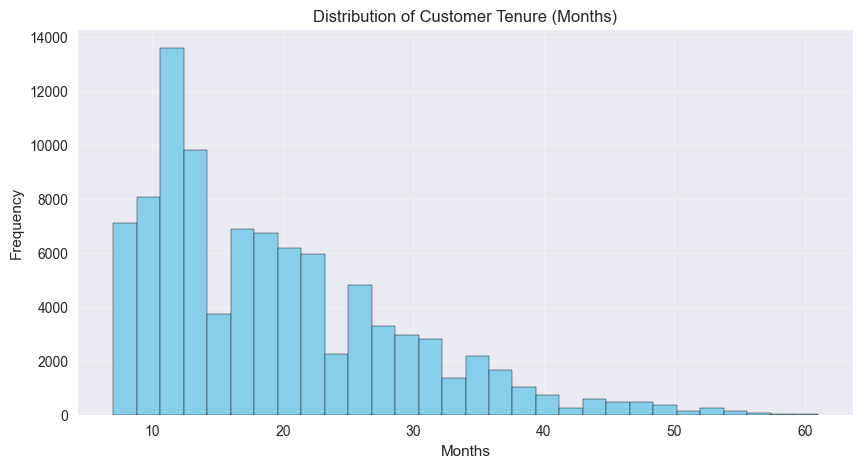

Tenure distribution plot saved to 'figures/tenure_distribution.png'


In [109]:
# Check churn distribution
churn_counts = df['churn'].value_counts()
print(f"\nChurn distribution:\n{churn_counts}")
print(f"Churn rate: {churn_counts[1] / len(df):.2%}")

# Visualize months distribution
plt.figure(figsize=(10, 5))
plt.hist(df['months'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Tenure (Months)')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.savefig('figures/tenure_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Tenure distribution plot saved to 'figures/tenure_distribution.png'")

# Variable Selection

In [110]:
df['churn'] = df['churn'].astype(int)


In [ ]:
# Using Label Encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

corr_matrix = df_encoded.corr()

#corr_matrix = df.select_dtypes(include=['number']).corr()

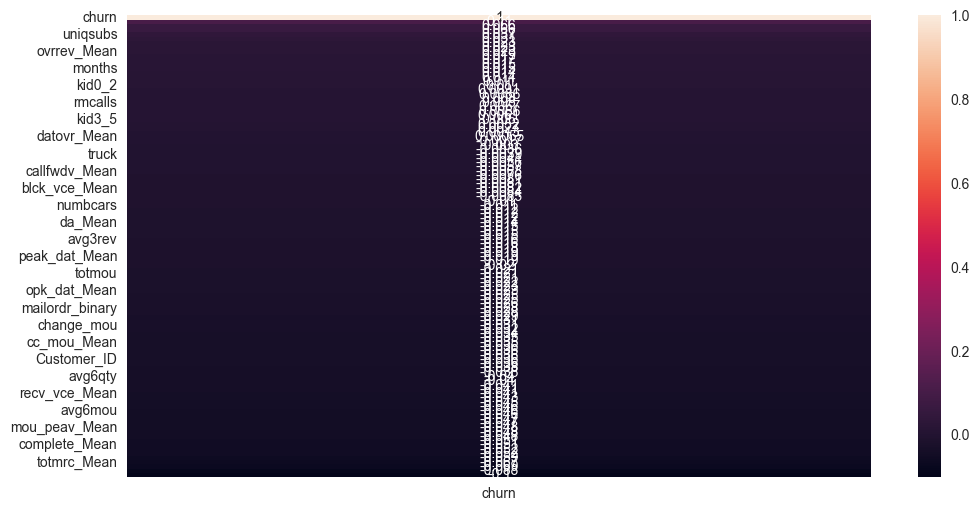

In [112]:

sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False), annot=True)
plt.show()


### Random Forest for Variable Selection


In [113]:
import pandas as pd
# import time
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE



# # Separate target
# y = df['churn'].astype(int)

# # Drop target from features
# X = df.drop(columns=['churn'])

# # One-hot encode categorical features
# X_encoded = pd.get_dummies(X, drop_first=True)
# print(f"Encoded feature shape: {X_encoded.shape}")

# # Initialize timer log
# timestamps = []

# # Start overall timing
# start = time.time()

# # Define model
# model = RandomForestClassifier(n_estimators=10, random_state=42)
# print("Model initialized")
# timestamps.append(("Model init", time.time() - start))

# # Initialize RFE
# rfe = RFE(model, n_features_to_select=20)
# print("RFE initialized")
# timestamps.append(("RFE init", time.time() - start))

# # Fit RFE
# rfe.fit(X_encoded, y)
# print("RFE fitting complete")
# timestamps.append(("RFE fit", time.time() - start))

# # Get selected features
# selected_features = X_encoded.columns[rfe.support_]
# print("\nSelected features:")
# print(selected_features)
# timestamps.append(("Features selected", time.time() - start))

# # Print time log
# print("\nTiming breakdown:")
# for step, t in timestamps:
#     print(f"{step}: {t:.2f} seconds")


In [114]:
#X_encoded.to_csv("X_encoded.csv")
#X_encoded.to_csv("X_encoded.csv")
#X_encoded.to_csv("X_encoded.csv")
#Encoded feature shape: (93893, 980)
# Model initialized
# RFE initialized
# RFE fitting complete

# Selected features:
# Index(['rev_Mean', 'mou_Mean', 'change_mou', 'change_rev', 'mou_cvce_Mean',
#        'mouowylisv_Mean', 'mou_peav_Mean', 'mou_opkv_Mean', 'totcalls',
#        'totmou', 'totrev', 'adjrev', 'adjqty', 'avgrev', 'avgmou', 'avgqty',
#        'avg3qty', 'avg6mou', 'eqpdays', 'Customer_ID'],
#       dtype='object')

# Timing breakdown:
# Model init: 0.00 seconds
# RFE init: 0.00 seconds
# RFE fit: 10852.33 seconds
# Features selected: 10852.48 seconds

## Final Variable Selected

In [115]:
def explain_variable_selection(df):
    """
    Select and explain the rationale for choosing specific variables for survival analysis.
    """
    print("VARIABLE SELECTION EXPLANATION")
    print("-" * 50)
    
    # Customer identification variables
    id_vars = [ 'area'] #, 'csa', 'customer_id',
    print(f"Customer Identification Variables: {id_vars}")
    print("Rationale: These variables help identify and group customers geographically.")
    
    # Dependent variable: Tenure (duration until churn)
    duration_var = 'months'
    print(f"\nDuration Variable: {duration_var}")
    print("Rationale: Represents customer tenure - the time dimension in survival analysis.")
    
    # Event indicator: Churn
    event_var = 'churn'
    print(f"\nEvent Variable: {event_var}")
    print("Rationale: Binary indicator of whether a customer has churned (event occurred) or not (censored).")
    
    # Key predictor variables with business relevance
    predictor_vars = [
        'totmou',               # Total minutes of use
        'adjmou',               # Adjusted minutes of use
        'totrev',               # Total revenue
        'avgrev',               # Average monthly revenue
        'avgmou',               # Average monthly minutes of use
        'new_cell',             # New customer indicator
        'asl_flag',             # Account spending limit flag
        'dualband',             # Technology adoption
        'rev_Mean',             # Mean revenue
        'mou_Mean',             # Mean minutes of use
        'change_mou',           # Change in minutes of use
        'change_rev',           # Change in revenue
        'mou_cvce_Mean',        # Mean usage on cvce calls
        'mouowylisv_Mean',      # Mean off-peak weekend usage
        'mou_peav_Mean',        # Mean usage on peav calls
        'mou_opkv_Mean',        # Mean usage on opkv calls
        'totcalls',             # Total number of calls
        'adjrev',               # Adjusted revenue
        'adjqty',               # Adjusted quantity
        'avgqty',               # Average quantity
        'avg3qty',              # 3-month average quantity
        'avg6mou',              # 6-month average minutes of use
        'avg3mou',              # 3-month average minutes of use
        'eqpdays'              # Equipment days
        #'totcalls',              # Total Calls
    ]


    
    print("\nKey Predictor Variables:")
    
    print("Usage-related Variables:")
    print("- totmou: Total minutes of use")
    print("  Rationale: Direct indicator of service usage intensity.")
    print("- avgmou: Average monthly minutes of use")
    print("  Rationale: Indicates consistent usage patterns.")
    
    print("\nRevenue-related Variables:")
    print("- totrev: Total revenue")
    print("  Rationale: Direct business impact measure.")
    print("- avgrev: Average monthly revenue")
    print("  Rationale: Indicates customer value and spending consistency.")
    
    print("\nService Quality Variables:")
    print("- drop_blk_Range: Call quality metric")
    print("  Rationale: Poor service experience is a key churn driver.")
    
    print("\nCustomer Profile Variables:")
    print("- new_cell: New customer indicator")
    print("  Rationale: New customers often have different churn patterns.")
    print("- asl_flag: Account spending limit flag")
    print("  Rationale: Credit risk indicator that may affect retention.")
    print("- prizm_social_one: Demographic segment")
    print("  Rationale: Demographic factors influence customer behavior and loyalty.")
    print("- dualband: Technology adoption")
    print("  Rationale: Technology adopters may have different engagement and loyalty.")
    
    # Return the selected variables for further analysis
    selected_vars = id_vars + [duration_var, event_var] + predictor_vars
    return selected_vars, duration_var, event_var, predictor_vars

selected_vars, duration_var, event_var, predictor_vars = explain_variable_selection(df)
    


VARIABLE SELECTION EXPLANATION
--------------------------------------------------
Customer Identification Variables: ['area']
Rationale: These variables help identify and group customers geographically.

Duration Variable: months
Rationale: Represents customer tenure - the time dimension in survival analysis.

Event Variable: churn
Rationale: Binary indicator of whether a customer has churned (event occurred) or not (censored).

Key Predictor Variables:
Usage-related Variables:
- totmou: Total minutes of use
  Rationale: Direct indicator of service usage intensity.
- avgmou: Average monthly minutes of use
  Rationale: Indicates consistent usage patterns.

Revenue-related Variables:
- totrev: Total revenue
  Rationale: Direct business impact measure.
- avgrev: Average monthly revenue
  Rationale: Indicates customer value and spending consistency.

Service Quality Variables:
- drop_blk_Range: Call quality metric
  Rationale: Poor service experience is a key churn driver.

Customer Profil

# Censoring Explanation


CENSORING APPROACH EXPLANATION
--------------------------------------------------
Total observations: 93893
Uncensored (churned) observations: 46716 (49.75%)
Right-censored observations: 47177 (50.25%)

Definition of Censoring in this Analysis:
- Event (churn=1): Customer has terminated service within the observation period.
- Right-censored (churn=0): Customer was still active at the end of the observation period.

Importance of Censoring:
- Right-censoring accounts for customers who haven't experienced the event by the
  end of the observation period but might do so in the future.
- Ignoring censoring would underestimate survival probabilities and lead to
  biased conclusions about customer lifetime.
- Survival analysis methods like Kaplan-Meier and parametric models properly
  account for censored observations in estimating survival functions.


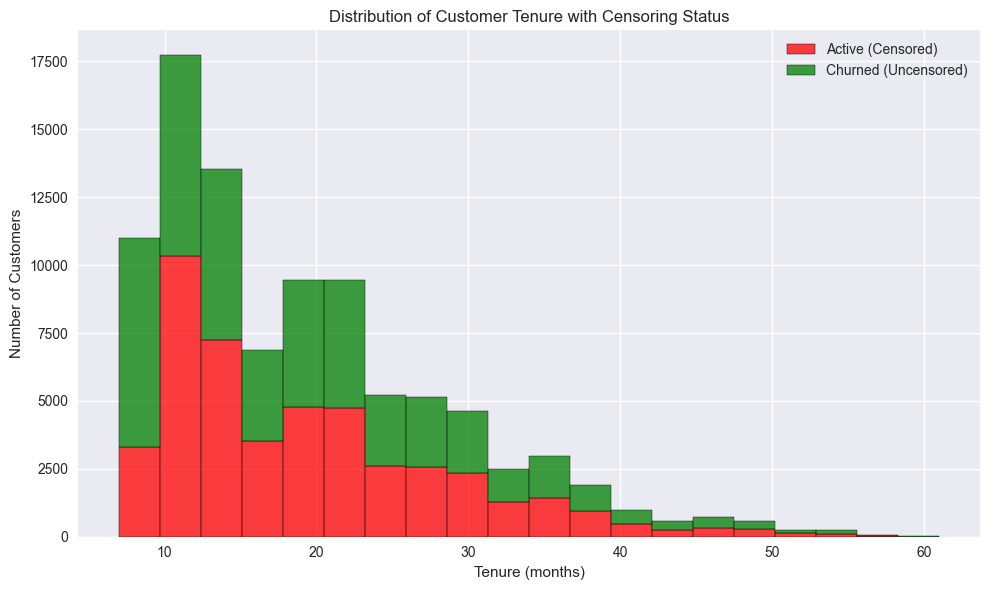

In [116]:
def explain_censoring_approach(df):
    """
    Provide a detailed explanation of the censoring approach used in the survival analysis.
    """
    print("\nCENSORING APPROACH EXPLANATION")
    print("-" * 50)
    
    # Count censored and uncensored observations
    censored_count = sum(df['churn'] == 0)
    uncensored_count = sum(df['churn'] == 1)
    total_count = len(df)
    
    print(f"Total observations: {total_count}")
    print(f"Uncensored (churned) observations: {uncensored_count} ({uncensored_count/total_count*100:.2f}%)")
    print(f"Right-censored observations: {censored_count} ({censored_count/total_count*100:.2f}%)")
    
    print("\nDefinition of Censoring in this Analysis:")
    print("- Event (churn=1): Customer has terminated service within the observation period.")
    print("- Right-censored (churn=0): Customer was still active at the end of the observation period.")
    
    print("\nImportance of Censoring:")
    print("- Right-censoring accounts for customers who haven't experienced the event by the")
    print("  end of the observation period but might do so in the future.")
    print("- Ignoring censoring would underestimate survival probabilities and lead to")
    print("  biased conclusions about customer lifetime.")
    print("- Survival analysis methods like Kaplan-Meier and parametric models properly")
    print("  account for censored observations in estimating survival functions.")
    
    # Create a visualization of censoring
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='months', hue='churn', bins=20, 
                 multiple='stack', palette=['green', 'red'])
    plt.xlabel('Tenure (months)')
    plt.ylabel('Number of Customers')
    plt.title('Distribution of Customer Tenure with Censoring Status')
    plt.legend(['Active (Censored)', 'Churned (Uncensored)'])
    plt.tight_layout()
    plt.savefig('censoring_visualization.png')
    plt.show()
    plt.close()
    


explain_censoring_approach(df)
    


# Kaplan-Meier Survival Analysis

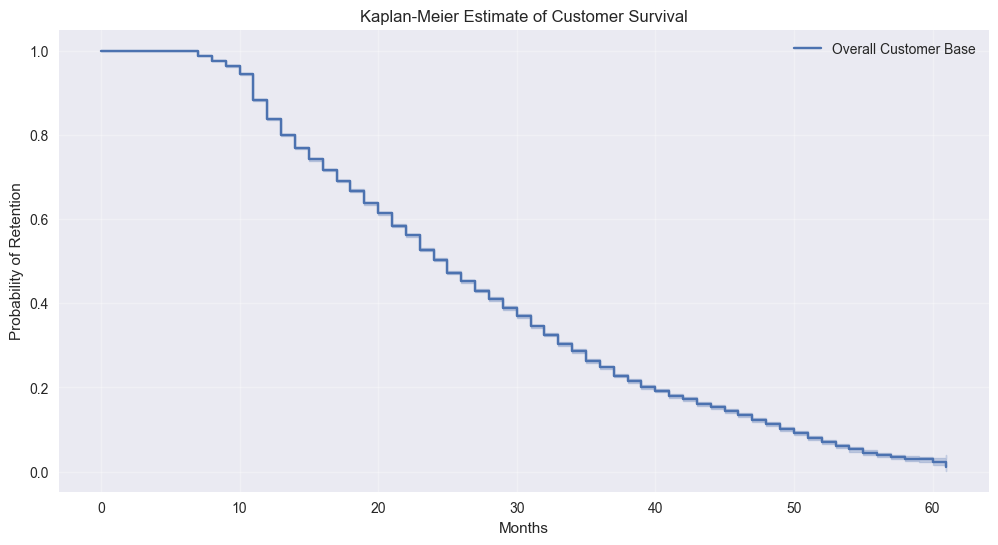

Overall survival curve saved to 'figures/overall_survival_curve.png'

Survival function (first 5 rows):


Overall Customer Base
timeline                       
0.0                    1.000000
7.0                    0.988146
8.0                    0.976214
9.0                    0.963741
10.0                   0.944304
11.0                   0.883816
12.0                   0.838765
13.0                   0.800153
14.0                   0.769193
15.0                   0.742152
16.0                   0.716566
17.0                   0.690561
18.0                   0.667534
19.0                   0.637511
20.0                   0.613835
21.0                   0.584198
22.0                   0.561789
23.0                   0.526777
24.0                   0.503185
25.0                   0.472645
26.0                   0.451938
27.0                   0.430048
28.0                   0.410453
29.0                   0.388488
30.0                   0.369151
31.0                   0.344807
32.0                   0.325444
33.0                   0.302942
34.0                   0.286238
35.0                   0.262815
36.0                   0.247353
37.0                   0.227985
38.0                   0.215102
39.0                   0.201218
40.0                   0.192507
41.0                   0.179910
42.0                   0.171562
43.0                   0.161147
44.0                   0.152816
45.0                   0.143581
46.0                   0.134929
47.0                   0.123324
48.0                   0.112541
49.0                   0.101019
50.0                   0.091076
51.0                   0.079144
52.0                   0.070369
53.0                   0.060596
54.0                   0.052499
55.0                   0.044857
56.0                   0.038876
57.0                   0.034495
58.0                   0.031046
59.0                   0.028976
60.0                   0.022537
61.0                   0.011268


Confidence intervals (first 5 rows):


Overall Customer Base_lower_0.95  Overall Customer Base_upper_0.95
0.0                           1.000000                          1.000000
7.0                           0.987433                          0.988819
8.0                           0.975213                          0.977176
9.0                           0.962508                          0.964934
10.0                          0.942780                          0.945789
11.0                          0.881655                          0.885940
12.0                          0.836262                          0.841233
13.0                          0.797408                          0.802865
14.0                          0.766278                          0.772078
15.0                          0.739100                          0.745175
16.0                          0.713396                          0.719709
17.0                          0.687278                          0.693817
18.0                          0.664158                          0.670884
19.0                          0.634025                          0.640974
20.0                          0.610265                          0.617382
21.0                          0.580534                          0.587843
22.0                          0.558055                          0.565505
23.0                          0.522946                          0.530591
24.0                          0.499292                          0.507064
25.0                          0.468680                          0.476598
26.0                          0.447924                          0.455943
27.0                          0.425984                          0.434105
28.0                          0.406346                          0.414554
29.0                          0.384338                          0.392635
30.0                          0.364964                          0.373337
31.0                          0.340581                          0.349035
32.0                          0.321186                          0.329708
33.0                          0.298653                          0.307241
34.0                          0.281924                          0.290565
35.0                          0.258471                          0.267177
36.0                          0.242985                          0.251743
37.0                          0.223588                          0.232409
38.0                          0.210682                          0.219555
39.0                          0.196772                          0.205701
40.0                          0.188044                          0.197011
41.0                          0.175425                          0.184441
42.0                          0.167061                          0.176114
43.0                          0.156628                          0.165724
44.0                          0.148278                          0.157417
45.0                          0.139022                          0.148211
46.0                          0.130346                          0.139592
47.0                          0.118712                          0.128028
48.0                          0.107901                          0.117287
49.0                          0.096352                          0.105811
50.0                          0.086379                          0.095918
51.0                          0.074417                          0.084049
52.0                          0.065636                          0.075310
53.0                          0.055856                          0.065586
54.0                          0.047674                          0.057636
55.0                          0.039913                          0.050200
56.0                          0.033799                          0.044457
57.0                          0.029278                          0.040334
58.0                          0.025523                          0.037371
59.0                          0.023259                          

In [117]:
# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model
# 'months' is our duration column
# 'churn' is our event indicator (1 = churned, 0 = still active/censored)
kmf.fit(df['months'], df['churn'], label='Overall Customer Base')

# Plot the survival function
plt.figure(figsize=(12, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Estimate of Customer Survival')
plt.xlabel('Months')
plt.ylabel('Probability of Retention')
plt.grid(alpha=0.3)
plt.savefig('figures/overall_survival_curve.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Overall survival curve saved to 'figures/overall_survival_curve.png'")

# Survival function
print("\nSurvival function (first 5 rows):")
display(kmf.survival_function_)

# Confidence intervals
print("\nConfidence intervals (first 5 rows):")
display(kmf.confidence_interval_)

# Stratified Analysis by Customer Segments

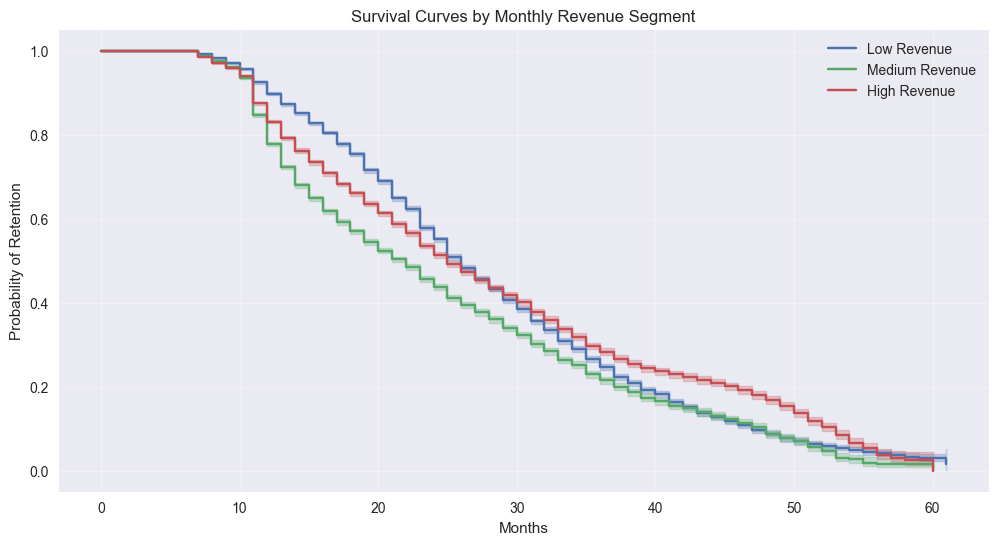

Revenue segment survival curves saved to 'figures/revenue_segment_survival.png'


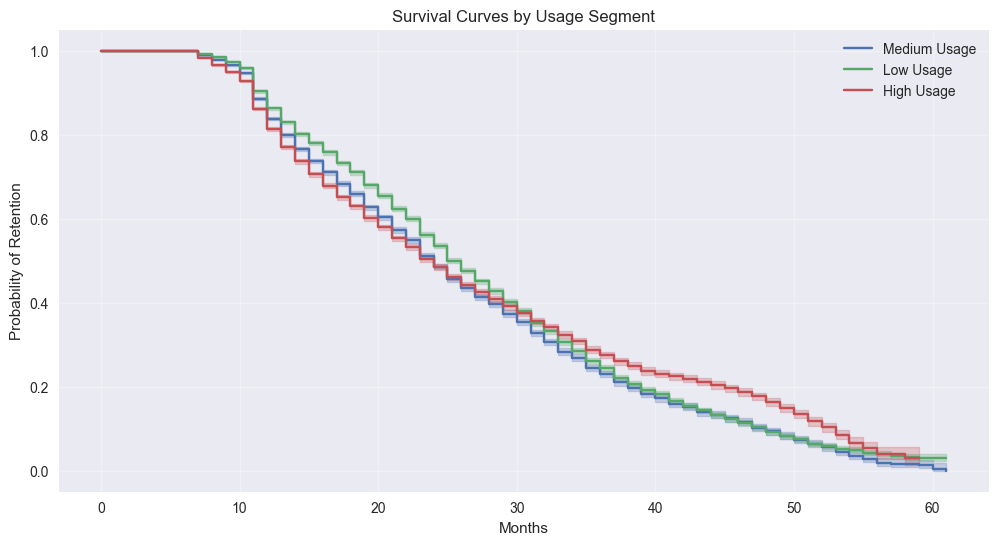

Usage segment survival curves saved to 'figures/usage_segment_survival.png'


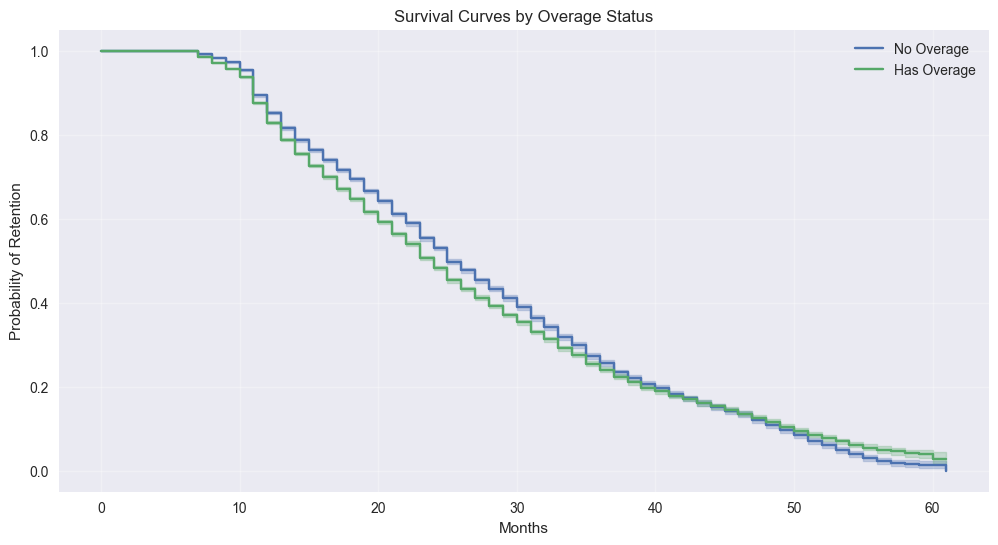

Overage status survival curves saved to 'figures/overage_survival.png'

Logrank test results for Low vs High Revenue:
p-value: 0.0000
Logrank test results for No Overage vs Has Overage:
p-value: 0.0000


In [118]:
# 4.1 Segment by Monthly Revenue (totmrc_Mean)
# Create high and low value customer segments
df['revenue_segment'] = pd.qcut(df['totmrc_Mean'], 3, labels=['Low', 'Medium', 'High'])

# Plot survival curves by revenue segment
plt.figure(figsize=(12, 6))

for segment in df['revenue_segment'].unique():
    segment_mask = (df['revenue_segment'] == segment)
    durations = df.loc[segment_mask, 'months']
    events = df.loc[segment_mask, 'churn']
    
    if durations.empty or events.empty:
        continue

    kmf = KaplanMeierFitter()
    kmf.fit(durations, events, label=f'{segment} Revenue')
    kmf.plot_survival_function()


plt.title('Survival Curves by Monthly Revenue Segment')
plt.xlabel('Months')
plt.ylabel('Probability of Retention')
plt.grid(alpha=0.3)
plt.savefig('figures/revenue_segment_survival.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Revenue segment survival curves saved to 'figures/revenue_segment_survival.png'")

# 4.2 Segment by Minutes of Use (mou_Mean)
df['usage_segment'] = pd.qcut(df['mou_Mean'], 3, labels=['Low', 'Medium', 'High'])

# Plot survival curves by usage segment
plt.figure(figsize=(12, 6))

for segment in df['usage_segment'].dropna().unique():
    segment_mask = (df['usage_segment'] == segment)
    durations = df.loc[segment_mask, 'months']
    events = df.loc[segment_mask, 'churn']

    # Skip if durations or events are empty or non-numeric
    if durations.empty or events.empty:
        print(f"Skipping segment '{segment}' — no data.")
        continue
    if not np.issubdtype(durations.dtype, np.number) or not np.issubdtype(events.dtype, np.number):
        print(f"Skipping segment '{segment}' — non-numeric data.")
        continue

    kmf = KaplanMeierFitter()
    kmf.fit(durations, events, label=f'{segment} Usage')
    kmf.plot_survival_function()

plt.title('Survival Curves by Usage Segment')
plt.xlabel('Months')
plt.ylabel('Probability of Retention')
plt.grid(alpha=0.3)
plt.savefig('figures/usage_segment_survival.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Usage segment survival curves saved to 'figures/usage_segment_survival.png'")

# 4.3 Segment by Overage Minutes (ovrmou_Mean)
# First, categorize customers into those with overage and those without
df['has_overage'] = (df['ovrmou_Mean'] > 0).astype(int)

# Plot survival curves by overage status
plt.figure(figsize=(12, 6))

# For customers with no overage
kmf_no_overage = KaplanMeierFitter()
mask_no_overage = (df['has_overage'] == 0)
kmf_no_overage.fit(df.loc[mask_no_overage, 'months'],
                  df.loc[mask_no_overage, 'churn'],
                  label='No Overage')
kmf_no_overage.plot_survival_function()

# For customers with overage
kmf_overage = KaplanMeierFitter()
mask_overage = (df['has_overage'] == 1)
kmf_overage.fit(df.loc[mask_overage, 'months'],
               df.loc[mask_overage, 'churn'],
               label='Has Overage')
kmf_overage.plot_survival_function()

plt.title('Survival Curves by Overage Status')
plt.xlabel('Months')
plt.ylabel('Probability of Retention')
plt.grid(alpha=0.3)
plt.savefig('figures/overage_survival.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Overage status survival curves saved to 'figures/overage_survival.png'")

# Perform logrank test to compare groups
# Revenue segments
low_rev = df[df['revenue_segment'] == 'Low']
high_rev = df[df['revenue_segment'] == 'High']

results = logrank_test(low_rev['months'], high_rev['months'], 
                     low_rev['churn'], high_rev['churn'])
print("\nLogrank test results for Low vs High Revenue:")
print(f"p-value: {results.p_value:.4f}")

# Overage status
no_overage = df[df['has_overage'] == 0]
has_overage = df[df['has_overage'] == 1]

results = logrank_test(no_overage['months'], has_overage['months'], 
                     no_overage['churn'], has_overage['churn'])
print("Logrank test results for No Overage vs Has Overage:")
print(f"p-value: {results.p_value:.4f}")

In [119]:
df['income']

0        4.0
1        5.0
2        6.0
3        6.0
4        6.0
5        9.0
6        1.0
7        4.0
8        9.0
9        6.0
10       9.0
11       5.0
12       7.0
13       3.0
14       1.0
15       3.0
16       4.0
17       3.0
18       1.0
19       6.0
20       5.0
21       6.0
22       5.0
23       6.0
24       9.0
25       9.0
26       1.0
27       6.0
28       6.0
29       9.0
30       3.0
31       5.0
32       7.0
33       9.0
34       7.0
35       9.0
36       7.0
37       9.0
38       9.0
39       8.0
40       9.0
41       6.0
42       6.0
43       6.0
44       9.0
45       5.0
46       5.0
47       7.0
48       6.0
49       3.0
50       8.0
51       3.0
52       7.0
53       6.0
54       6.0
55       7.0
56       7.0
57       7.0
58       5.0
59       5.0
60       6.0
61       6.0
62       6.0
63       6.0
64       9.0
65       6.0
66       6.0
67       9.0
68       3.0
69       6.0
70       4.0
71       6.0
72       7.0
73       7.0
74       5.0
75       7.0
76       4.0

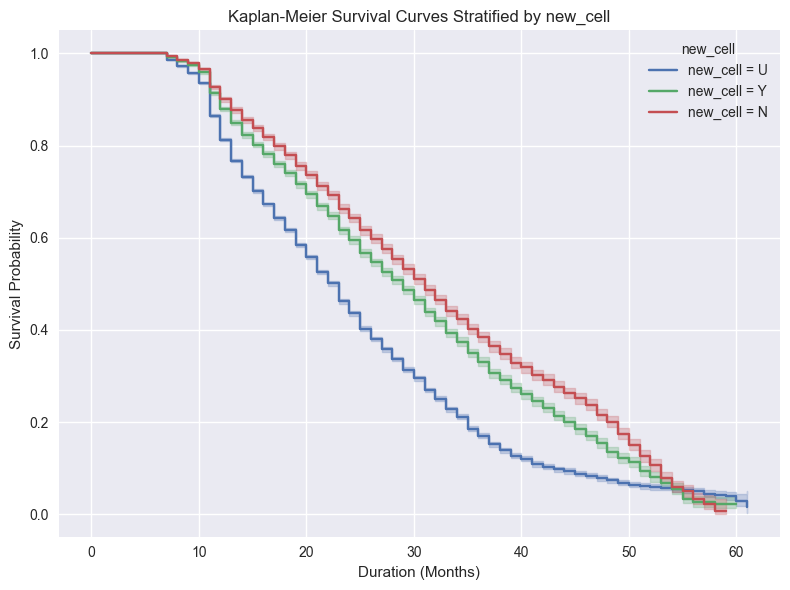

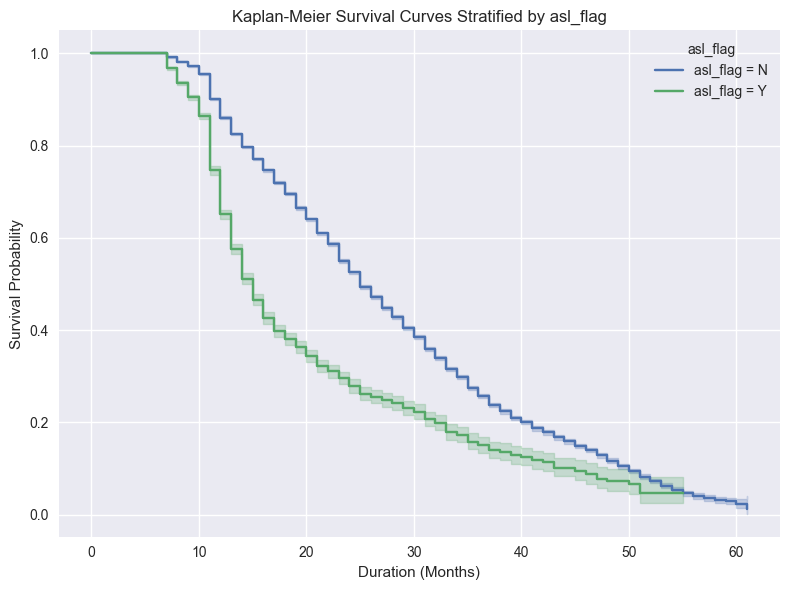

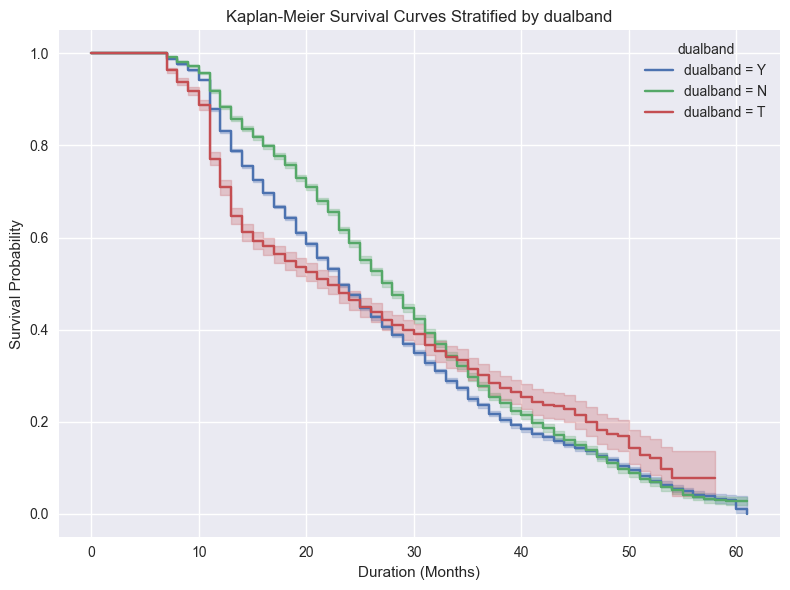

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Define duration and event columns
duration_col = 'months'
event_col = 'churn'

# Define categorical stratification variables
stratification_vars = ['new_cell', 'asl_flag',  'dualband']

# Plot KMF curves stratified by each variable
for var in stratification_vars:
    plt.figure(figsize=(8, 6))
    for level in df[var].dropna().unique():
        mask = df[var] == level
        kmf.fit(df.loc[mask, duration_col], df.loc[mask, event_col], label=f"{var} = {level}")
        kmf.plot_survival_function(ci_show=True)
    
    plt.title(f"Kaplan-Meier Survival Curves Stratified by {var}")
    plt.xlabel("Duration (Months)")
    plt.ylabel("Survival Probability")
    plt.legend(title=var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [121]:
df['income_bin'] = pd.cut(df['income'], bins=3, labels=['Low Income', 'Mid Income', 'High Income'])
df['hnd_price_bin'] = pd.qcut(df['hnd_price'], q=3, labels=['Budget', 'Midrange', 'Premium'])
df['eqp_age_bin'] = pd.qcut(df['eqpdays'], q=3, labels=['New', 'Medium', 'Old'])
df['usage_bin'] = pd.cut(df['avg3mou'], bins=4, labels=['Very Low', 'Low', 'High', 'Very High'])



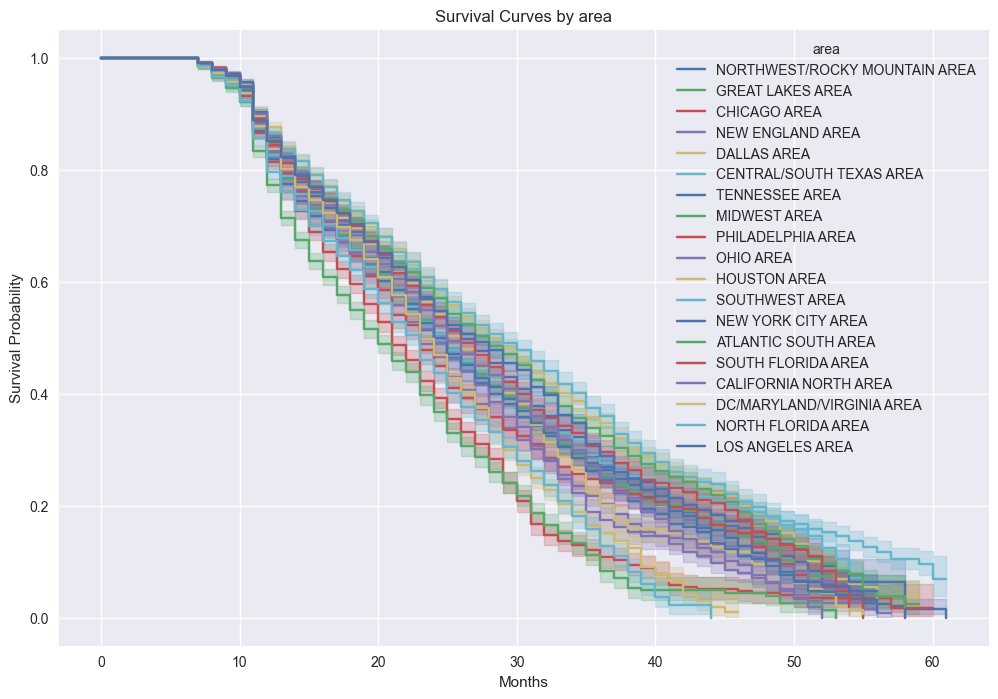

    rank                           area  survival_probability
2    1.0                   CHICAGO AREA              0.207771
13   2.0            ATLANTIC SOUTH AREA              0.217378
16   3.0      DC/MARYLAND/VIRGINIA AREA              0.272748
17   4.0             NORTH FLORIDA AREA              0.279914
3    5.0               NEW ENGLAND AREA              0.316804
8    6.0              PHILADELPHIA AREA              0.324251
9    7.0                      OHIO AREA              0.340061
0    8.0  NORTHWEST/ROCKY MOUNTAIN AREA              0.358489
12   9.0             NEW YORK CITY AREA              0.369248
1   10.0               GREAT LAKES AREA              0.374772
10  11.0                   HOUSTON AREA              0.381155
15  12.0          CALIFORNIA NORTH AREA              0.387713
11  13.0                 SOUTHWEST AREA              0.397571
14  14.0             SOUTH FLORIDA AREA              0.398647
6   15.0                 TENNESSEE AREA              0.407704
18  16.0

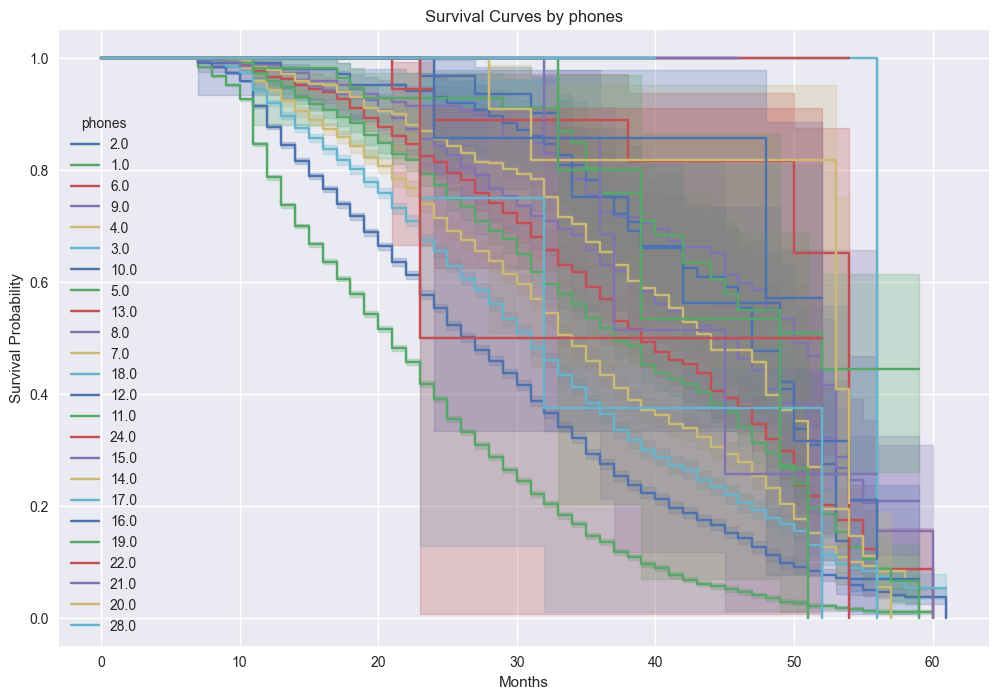

    rank  phones  survival_probability
1    1.0     1.0              0.244140
0    2.0     2.0              0.415514
20   3.0    22.0              0.500000
5    4.0     3.0              0.510144
4    5.0     4.0              0.596190
7    6.0     5.0              0.648871
2    7.0     6.0              0.704981
9    8.0     8.0              0.735198
17   9.0    17.0              0.750000
10  10.0     7.0              0.792800
3   11.0     9.0              0.856875
18  12.0    16.0              0.857143
6   13.0    10.0              0.871636
8   14.0    13.0              0.888889
16  15.0    14.0              0.909091
13  16.0    11.0              0.909621
12  17.0    12.0              0.935484
15  18.0    15.0              1.000000
11  18.0    18.0              1.000000
14  18.0    24.0              1.000000
19  18.0    19.0              1.000000
21  18.0    21.0              1.000000
22  18.0    20.0              1.000000
23  18.0    28.0              1.000000


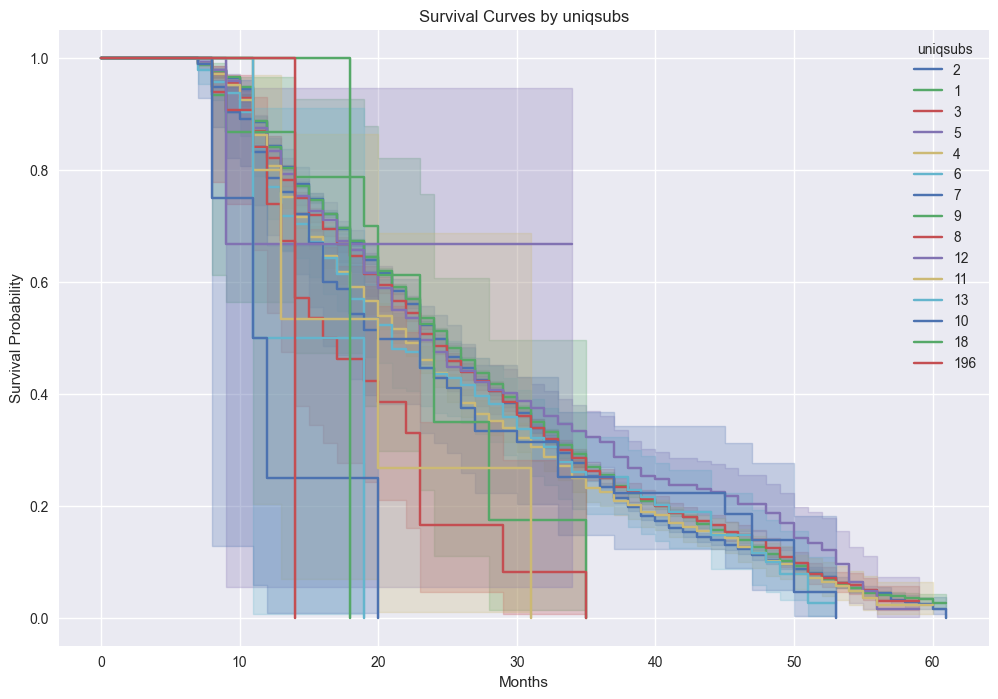

    rank  uniqsubs  survival_probability
12   1.0        10              0.000000
13   1.0        18              0.000000
14   1.0       196              0.000000
11   1.0        13              0.000000
8    5.0         8              0.082367
7    6.0         9              0.175084
10   7.0        11              0.266667
6    8.0         7              0.313422
4    9.0         4              0.321712
5   10.0         6              0.336823
2   11.0         3              0.360777
0   12.0         2              0.366393
1   13.0         1              0.373623
3   14.0         5              0.386310
9   15.0        12              0.666667


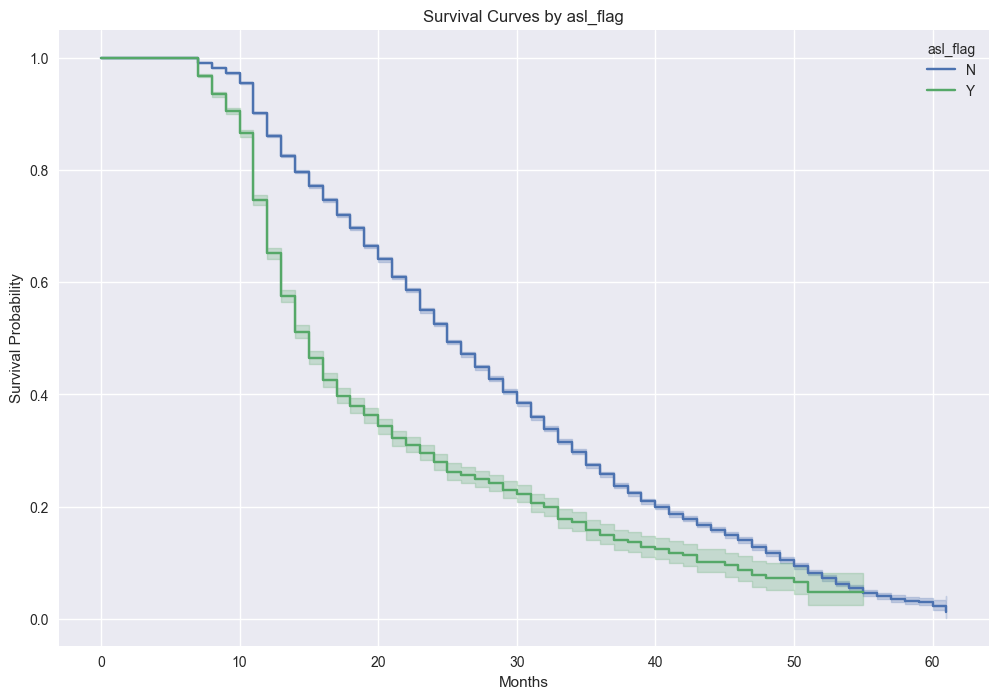

   rank asl_flag  survival_probability
1   1.0        Y              0.223155
0   2.0        N              0.384553


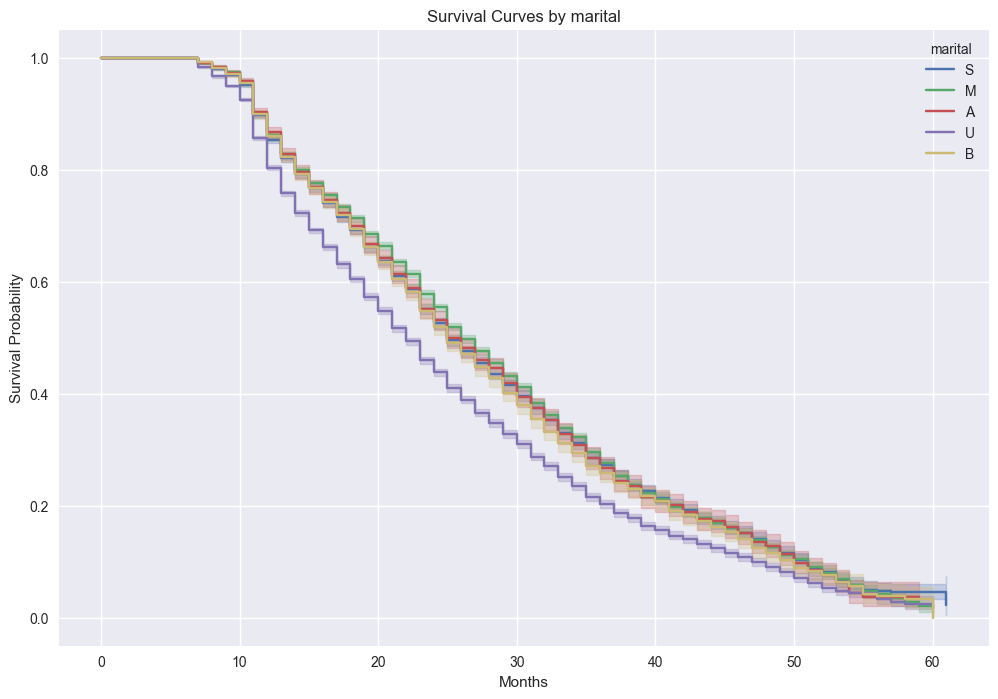

   rank marital  survival_probability
3   1.0       U              0.310417
4   2.0       B              0.379354
2   3.0       A              0.394680
0   4.0       S              0.396575
1   5.0       M              0.411404


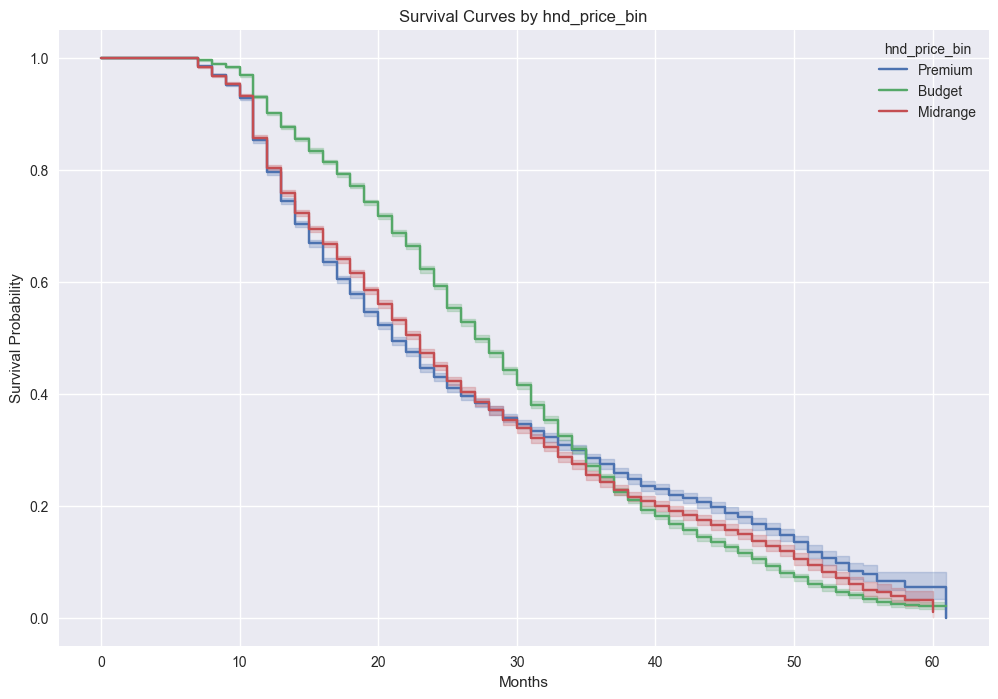

   rank hnd_price_bin  survival_probability
2   1.0      Midrange              0.338503
0   2.0       Premium              0.345915
1   3.0        Budget              0.415100


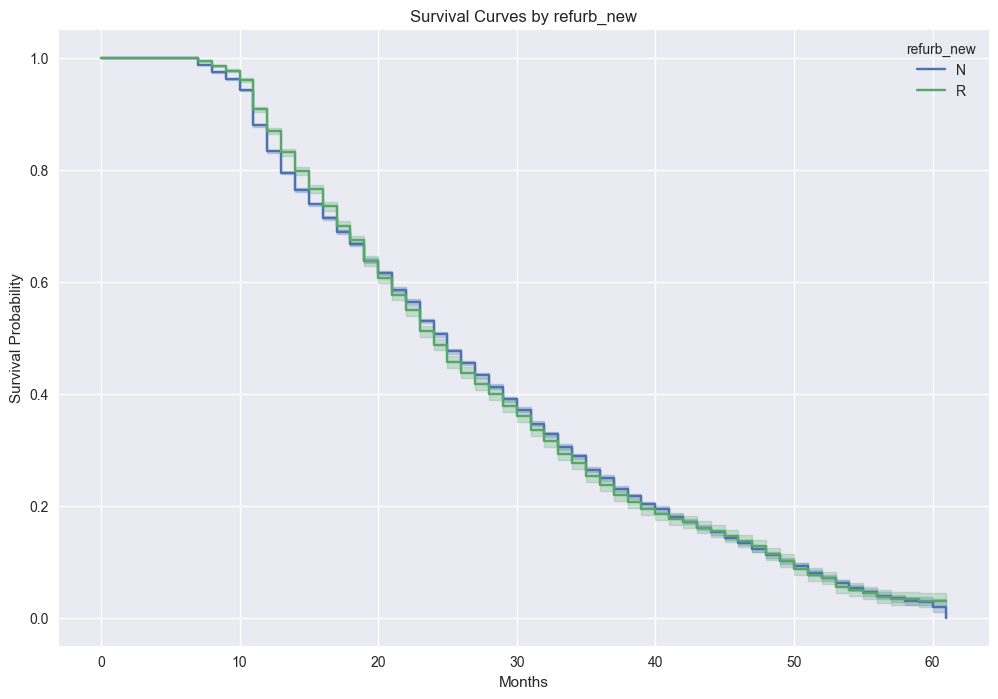

   rank refurb_new  survival_probability
1   1.0          R              0.359673
0   2.0          N              0.371031


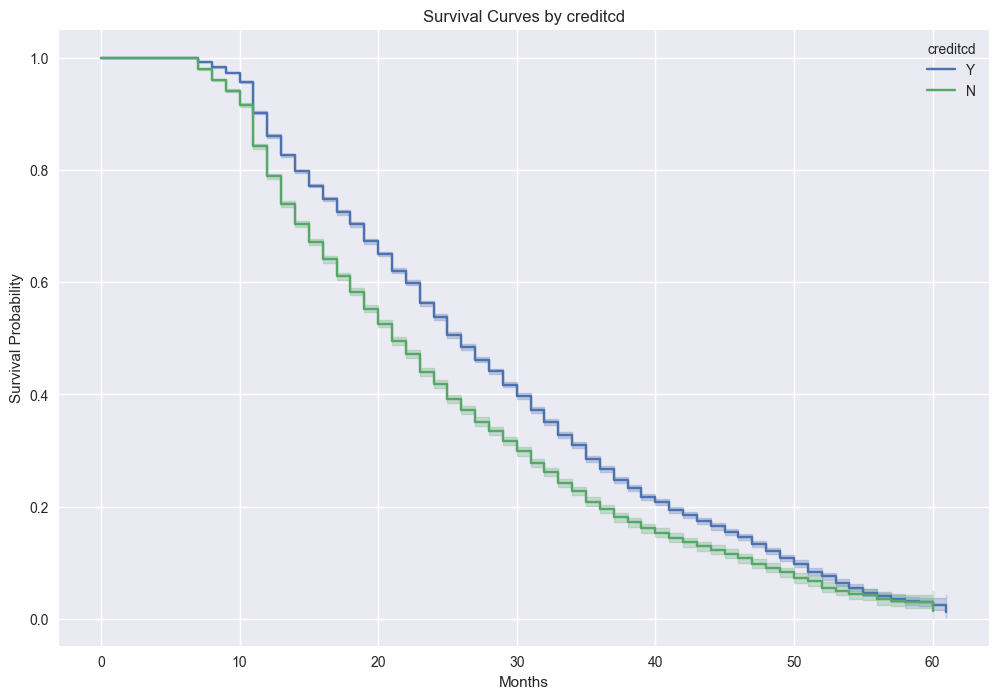

   rank creditcd  survival_probability
1   1.0        N              0.298817
0   2.0        Y              0.397790


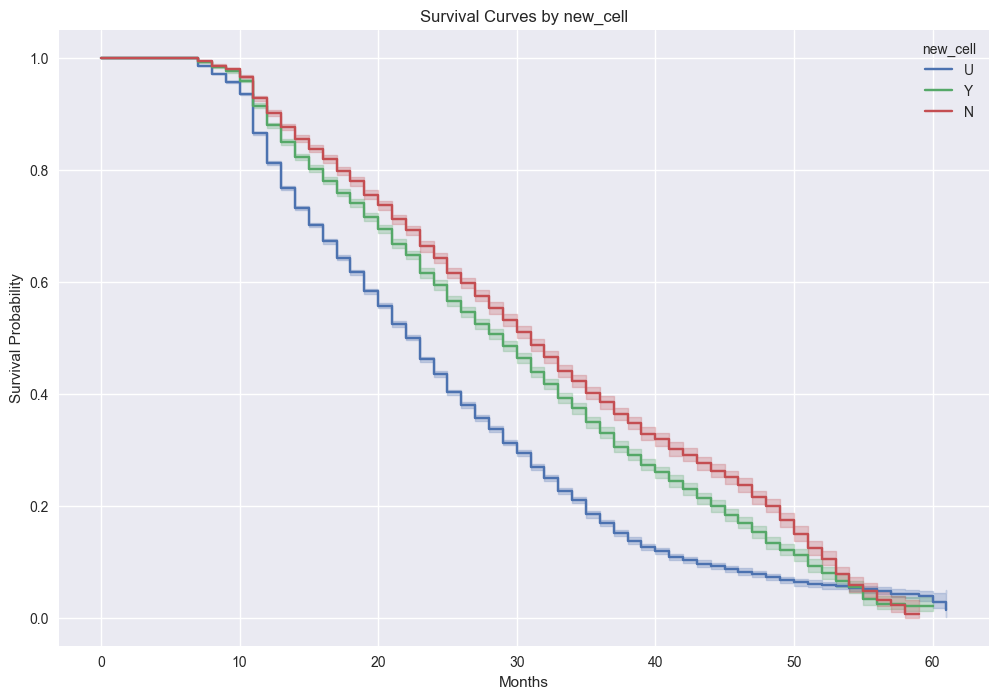

   rank new_cell  survival_probability
0   1.0        U              0.294933
1   2.0        Y              0.464639
2   3.0        N              0.510809


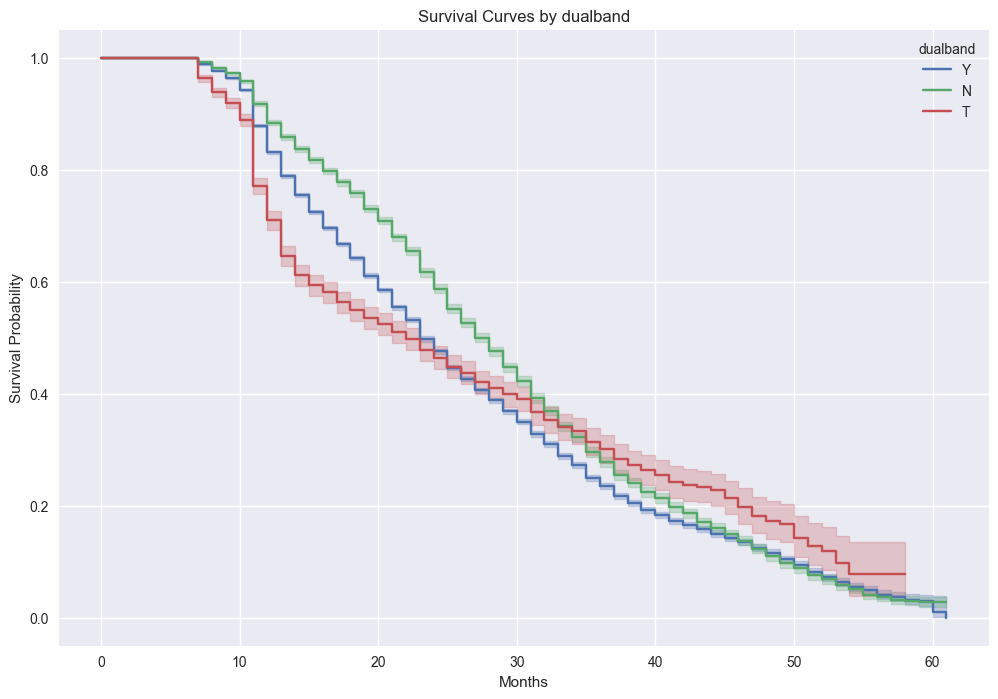

   rank dualband  survival_probability
0   1.0        Y              0.350230
2   2.0        T              0.390534
1   3.0        N              0.422843


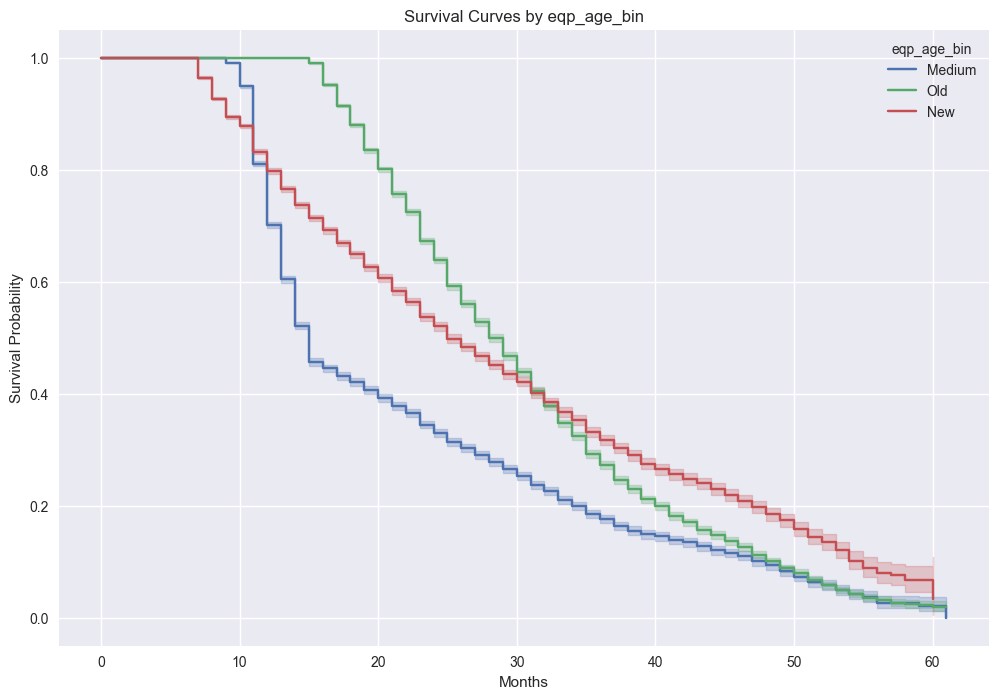

   rank eqp_age_bin  survival_probability
0   1.0      Medium              0.253224
2   2.0         New              0.421636
1   3.0         Old              0.438889


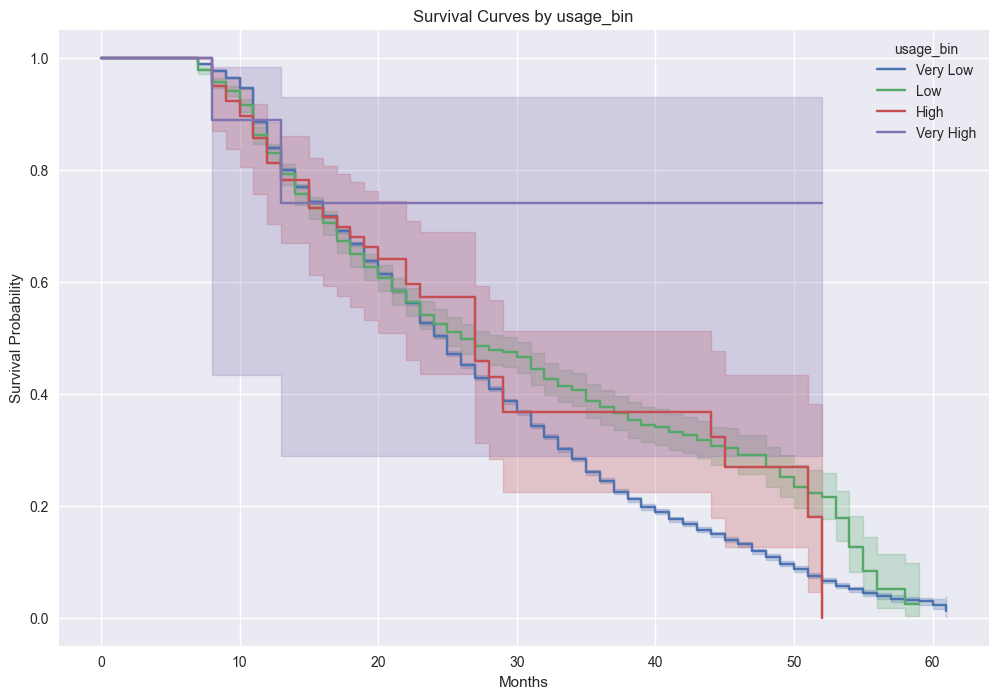

   rank  usage_bin  survival_probability
0   1.0   Very Low              0.367115
2   2.0       High              0.368247
1   3.0        Low              0.464909
3   4.0  Very High              0.740741


In [122]:
ssegmentation_vars = [
    'area',
    'phones',
    'uniqsubs',
    'asl_flag',
    'marital',
    'hnd_price_bin',     # Binned: Budget, Midrange, Premium
    'refurb_new',
    'creditcd',
    'new_cell',
    'dualband',
    'eqp_age_bin',       # Binned: <1 year, 1–2 years, 2+ years
    'usage_bin'          # Binned: Very Low, Low, High, Very High
]

for i in ssegmentation_vars:
    plt.figure(figsize=(12, 8))  

    for segment in df[i].dropna().unique():
        kmf.fit(df[df[i] == segment]['months'],
                df[df[i] == segment]['churn'],
                label=str(segment))
        kmf.plot_survival_function()

    plt.title(f'Survival Curves by {i}')
    plt.xlabel('Months')
    plt.ylabel('Survival Probability')
    plt.legend(title=f'{i}')
    plt.grid(True)
    plt.show()




    time_point = 30

    survival_probs_list = []

    for segment in df[i].dropna().unique():
        kmf.fit(df[df[i] == segment]['months'],
                df[df[i] == segment]['churn'],
                label=str(segment))
        survival_prob = kmf.survival_function_at_times([time_point]).iloc[0]
        survival_probs_list.append({f'{i}': segment, 'survival_probability': survival_prob})

    survival_probs = pd.DataFrame(survival_probs_list)

    survival_probs = survival_probs.sort_values(by='survival_probability', ascending=True)
    survival_probs['rank'] = survival_probs['survival_probability'].rank(method='min')

    print(survival_probs[['rank', f'{i}', 'survival_probability']])





Top segments by churn rate (with counts):
 • HighValue_GoodQoE_OldCust_OldEqp_Newbie_LowTech: n=137, churn_rate=0.672
 • HighValue_GoodQoE_YoungCust_OldEqp_Newbie_LowTech: n=239, churn_rate=0.669
 • HighValue_GoodQoE_YoungCust_OldEqp_Loyal_LowTech: n=433, churn_rate=0.661
 • HighValue_GoodQoE_OldCust_OldEqp_Loyal_LowTech: n=319, churn_rate=0.639
 • LowValue_GoodQoE_YoungCust_OldEqp_Newbie_LowTech: n=728, churn_rate=0.637

Plotting survival curves for top 5 segments (min_size=1)…


C:\Users\felix\AppData\Local\Temp\ipykernel_16180\2746518750.py:100: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\felix\AppData\Local\Temp\ipykernel_16180\2746518750.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig('looser_segment_survival.png')
C:\Users\felix\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


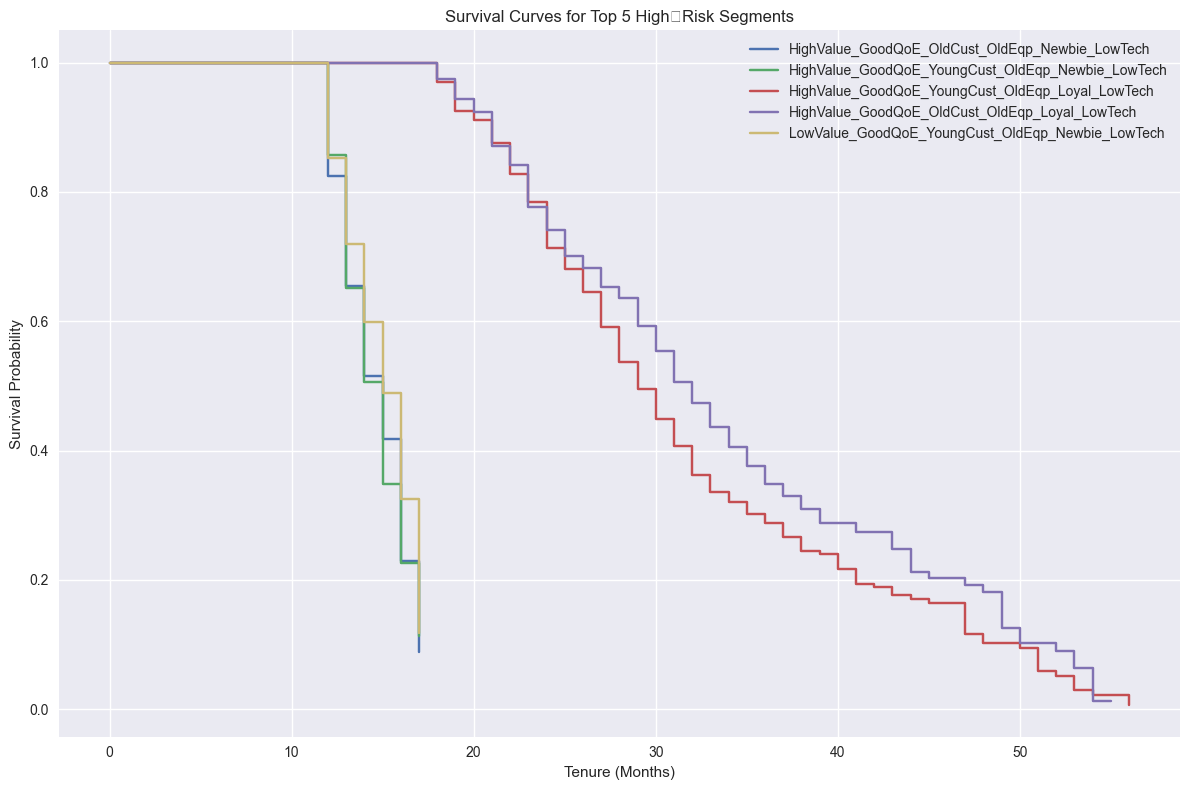

Saved: looser_segment_survival.png


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

def perform_looser_segmentation(
    df,
    duration_col='months',
    event_col='churn',
    plot_top_n=5,
    min_size=1
):
    """
    Performs a simplified, binary-binned customer segmentation on:
      • Value (Low vs High)
      • QoE (Good vs Poor)
      • Age (Young vs Old)
      • Equipment Age (New vs Old)
      • Loyalty (New vs Loyal)
      • Tech Level (HighTech vs LowTech)
    Then computes churn rates, prints counts, and plots KM curves.
    """
    # 1) Value: split at median
    df['value_tier'] = np.where(
        df['avgrev'] * df['avgmou'] > (df['avgrev'] * df['avgmou']).median(),
        'HighValue',
        'LowValue'
    )
    
    # 2) QoE: composite score at median
    df['qoe_score'] = (
        df['drop_vce_Mean'].fillna(0) +
        df['blck_vce_Mean'].fillna(0) +
        df['comp_vce_Mean'].fillna(0) +
        df['custcare_Mean'].fillna(0)
    )
    df['qoe_bin'] = np.where(
        df['qoe_score'] > df['qoe_score'].median(),
        'PoorQoE',
        'GoodQoE'
    )
    
    # 3) Age: split at median
    med_age = df['age1'].median()
    df['age_bin'] = np.where(df['age1'] > med_age, 'OldCust', 'YoungCust')
    
    # 4) Equipment Age: split at median eqpdays
    med_eqp = df['eqpdays'].median()
    df['eqp_age_bin'] = np.where(df['eqpdays'] > med_eqp, 'OldEqp', 'NewEqp')
    
    # 5) Loyalty (tenure): split at median months
    med_tenure = df[duration_col].median()
    df['loyalty_bin'] = np.where(df[duration_col] > med_tenure, 'Loyal', 'Newbie')
    
    # 6) Tech Level: dualband Y vs N
    df['tech_bin'] = np.where(
        (df['dualband'] == 'Y'),
        'HighTech',
        'LowTech'
    )
    
    # Combine into one segment label
    df['segment'] = (
        df['value_tier'] + '_' +
        df['qoe_bin'] + '_' +
        df['age_bin'] + '_' +
        df['eqp_age_bin'] + '_' +
        df['loyalty_bin'] + '_' +
        df['tech_bin']
    )
    
    # Compute churn rates and counts
    churn_rates = df.groupby('segment')[event_col].mean().sort_values(ascending=False)
    churn_counts = df['segment'].value_counts()
    top_segments = churn_rates.head(plot_top_n).index.tolist()
    
    # Print top segments
    print("\nTop segments by churn rate (with counts):")
    for seg in top_segments:
        print(f" • {seg}: n={churn_counts.get(seg,0)}, churn_rate={churn_rates.loc[seg]:.3f}")
    
    # Plot KM curves
    print(f"\nPlotting survival curves for top {plot_top_n} segments (min_size={min_size})…")
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    
    for seg in top_segments:
        subset = df[df['segment'] == seg]
        if len(subset) < min_size:
            print(f"   – skipping {seg} (n={len(subset)} < {min_size})")
            continue
        kmf.fit(subset[duration_col], event_observed=subset[event_col], label=seg)
        kmf.plot_survival_function(ax=ax, ci_show=False)
    
    ax.set_title(f"Survival Curves for Top {plot_top_n} High‑Risk Segments")
    ax.set_xlabel("Tenure (Months)")
    ax.set_ylabel("Survival Probability")
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('looser_segment_survival.png')
    plt.show()
    plt.close()
    print("Saved: looser_segment_survival.png")
    
    return df, churn_rates

# Example usage:
df2, churn2 = perform_looser_segmentation(df, duration_col='months', event_col='churn')


# Parametric Survival Models

In [139]:
print(model_df['churn'].value_counts(normalize=True))


churn
0    0.502455
1    0.497545
Name: proportion, dtype: float64


Shape after dropping missing values: (93893, 46)

Fitting Weibull AFT model...
Weibull AFT Model Summary:


coef  exp(coef)  se(coef)  \
param   covariate                                                               
lambda_ adjmou                              4.152056e-06   1.000004  0.000017   
        adjqty                             -7.022072e-04   0.999298  0.000045   
        adjrev                              1.553789e-03   1.001555  0.000023   
        area_CALIFORNIA NORTH AREA          2.908907e-02   1.029516  0.007108   
        area_CENTRAL/SOUTH TEXAS AREA       1.071919e-01   1.113148  0.008012   
        area_CHICAGO AREA                   2.837848e-02   1.028785  0.007418   
        area_DALLAS AREA                    8.191869e-02   1.085368  0.007374   
        area_DC/MARYLAND/VIRGINIA AREA      4.419594e-02   1.045187  0.007147   
        area_GREAT LAKES AREA               6.852151e-02   1.070924  0.007729   
        area_HOUSTON AREA                   5.881915e-02   1.060583  0.007963   
        area_LOS ANGELES AREA               1.758503e-01   1.192260  0.007166   
        area_MIDWEST AREA                   1.183393e-01   1.125626  0.007238   
        area_NEW ENGLAND AREA               3.019342e-02   1.030654  0.007253   
        area_NEW YORK CITY AREA             5.286307e-02   1.054285  0.006346   
        area_NORTH FLORIDA AREA             2.800115e-02   1.028397  0.007705   
        area_NORTHWEST/ROCKY MOUNTAIN AREA  3.842914e-02   1.039177  0.007540   
        area_OHIO AREA                      4.398158e-02   1.044963  0.007815   
        area_PHILADELPHIA AREA              2.526963e-02   1.025592  0.009312   
        area_SOUTH FLORIDA AREA             2.602303e-02   1.026365  0.008299   
        area_SOUTHWEST AREA                 2.293832e-01   1.257824  0.007233   
        area_TENNESSEE AREA                 6.203351e-02   1.063998  0.009217   
        asl_flag_Y                          2.038287e-02   1.020592  0.004321   
        avg3mou                             1.384656e-04   1.000138  0.000016   
        avg3qty                            -2.419065e-04   0.999758  0.000028   
        avg6mou                             1.191848e-04   1.000119  0.000013   
        avgmou                             -2.912801e-04   0.999709  0.000018   
        avgqty                              3.343124e-05   1.000033  0.000040   
        avgrev                             -6.579204e-03   0.993442  0.000089   
        change_mou                          8.470521e-05   1.000085  0.000007   
        change_rev                         -2.989360e-04   0.999701  0.000026   
        dualband_T                         -2.132987e-02   0.978896  0.007293   
        dualband_Y                         -3.778255e-02   0.962922  0.003078   
        eqpdays                             2.441978e-04   1.000244  0.000005   
        mou_Mean                            1.813980e-05   1.000018  0.000014   
        mou_cvce_Mean                       1.269303e-05   1.000013  0.000018   
        mou_opkv_Mean                      -5.303945e-07   0.999999  0.000017   
        mou_peav_Mean                      -3.869026e-05   0.999961  0.000016   
        mouowylisv_Mean                    -9.040035e-05   0.999910  0.000035   
        new_cell_U                         -7.434647e-02   0.928350  0.003736   
        new_cell_Y                         -8.869497e-03   0.991170  0.004353   
        rev_Mean                           -2.323656e-04   0.999768  0.000051   
        totcalls                            7.245254e-04   1.000725  0.000045   
        totmou                             -1.820720e-05   0.999982  0.000016   
        totrev                             -9.187289e-04   0.999082  0.000022   
        Intercept                           2.955640e+00  19.214020  0.007447   
rho_    Intercept                           1.321606e+00   3.749439  0.003029   

                                            coef lower 95%  coef upper 95%  \
param   covariate                                                            
lambda_


Fitting Log-Logistic AFT model...
Log-Logistic AFT Model Summary:


coef  exp(coef)  se(coef)  \
param  covariate                                                           
alpha_ adjmou                             -0.000130   0.999870  0.000014   
       adjqty                             -0.000286   0.999714  0.000036   
       adjrev                              0.001679   1.001680  0.000023   
       area_CALIFORNIA NORTH AREA          0.017538   1.017693  0.005399   
       area_CENTRAL/SOUTH TEXAS AREA       0.047404   1.048545  0.006096   
       area_CHICAGO AREA                   0.010574   1.010631  0.005587   
       area_DALLAS AREA                    0.038913   1.039680  0.005597   
       area_DC/MARYLAND/VIRGINIA AREA      0.032300   1.032827  0.005343   
       area_GREAT LAKES AREA               0.031405   1.031903  0.005836   
       area_HOUSTON AREA                   0.041506   1.042380  0.006013   
       area_LOS ANGELES AREA               0.083938   1.087561  0.005539   
       area_MIDWEST AREA                   0.051080   1.052407  0.005446   
       area_NEW ENGLAND AREA               0.019372   1.019561  0.005485   
       area_NEW YORK CITY AREA             0.031332   1.031828  0.004771   
       area_NORTH FLORIDA AREA             0.017541   1.017696  0.005870   
       area_NORTHWEST/ROCKY MOUNTAIN AREA  0.008482   1.008518  0.005813   
       area_OHIO AREA                      0.025655   1.025987  0.005858   
       area_PHILADELPHIA AREA              0.014681   1.014789  0.007050   
       area_SOUTH FLORIDA AREA             0.022278   1.022528  0.006394   
       area_SOUTHWEST AREA                 0.041163   1.042022  0.005474   
       area_TENNESSEE AREA                 0.036817   1.037503  0.007003   
       asl_flag_Y                         -0.020560   0.979650  0.003263   
       avg3mou                             0.000160   1.000160  0.000031   
       avg3qty                             0.000034   1.000034  0.000024   
       avg6mou                             0.000161   1.000161  0.000011   
       avgmou                             -0.000130   0.999870  0.000016   
       avgqty                              0.000243   1.000243  0.000038   
       avgrev                             -0.010621   0.989435  0.000104   
       change_mou                          0.000125   1.000125  0.000011   
       change_rev                         -0.000155   0.999845  0.000033   
       dualband_T                         -0.021050   0.979170  0.005711   
       dualband_Y                         -0.019359   0.980827  0.002360   
       eqpdays                             0.000292   1.000292  0.000005   
       mou_Mean                           -0.000111   0.999889  0.000030   
       mou_cvce_Mean                      -0.000019   0.999981  0.000013   
       mou_opkv_Mean                       0.000075   1.000075  0.000013   
       mou_peav_Mean                       0.000087   1.000087  0.000013   
       mouowylisv_Mean                    -0.000034   0.999966  0.000029   
       new_cell_U                         -0.035058   0.965549  0.002899   
       new_cell_Y                          0.003187   1.003192  0.003396   
       rev_Mean                           -0.000872   0.999128  0.000051   
       totcalls                            0.000283   1.000283  0.000035   
       totmou                              0.000108   1.000108  0.000014   
       totrev                             -0.000819   0.999181  0.000023   
       Intercept                           2.797826  16.408930  0.006047   
beta_  Intercept                           1.925741   6.860230  0.003834   

                                           coef lower 95%  coef upper 95%  \
param  covariate                                                            
alpha_ adjmou                                   -0.000157       -0.000102   
       adjqty                                   -0.000356       -0.000216   
       adjrev                                    0.001633        0.001724   
       area_C


Fitting Exponential model...
Exponential Model:
Lambda (rate parameter): 38.42871097592888

Model Comparison using AIC:
Weibull AFT AIC: 341906.64948517934
Log-Logistic AFT AIC: 321348.9167859722


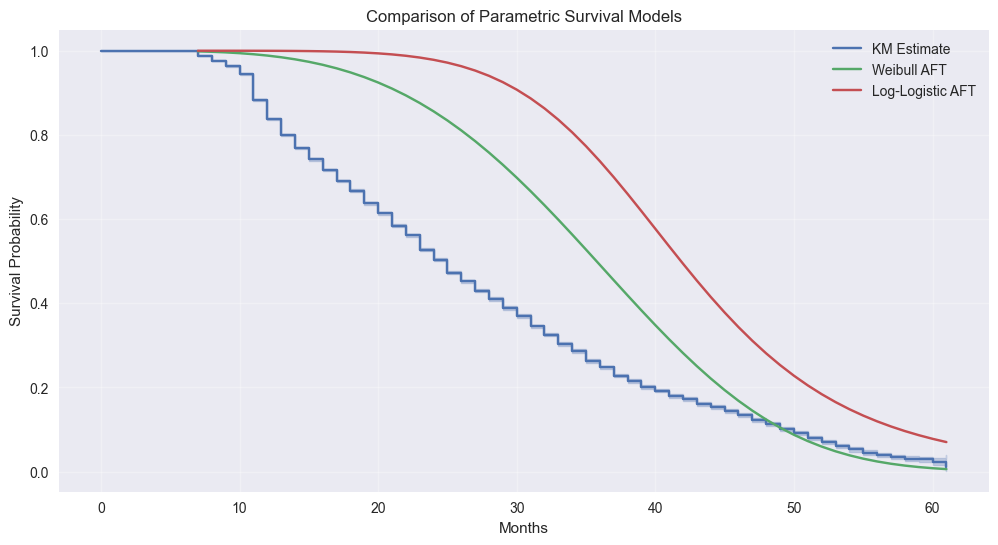

In [126]:
# First, copy your dataframe selecting only the columns in selected_vars
model_df = df[selected_vars].copy()

categorical_vars = model_df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode categorical variables (drop_first=True to avoid multicollinearity)
model_df_encoded = pd.get_dummies(model_df, columns=categorical_vars, drop_first=True)

model_df = model_df_encoded


# # Check for missing values in the modeling dataset
# print("Missing values in the modeling dataset:")
# print(model_df.isnull().sum())

# Drop rows with missing values
model_df = model_df.dropna()
print(f"Shape after dropping missing values: {model_df.shape}")

# 5.1 Fit Weibull AFT model
print("\nFitting Weibull AFT model...")
waft = WeibullAFTFitter()
waft.fit(model_df, duration_col='months', event_col='churn')

# Display model summary
print("Weibull AFT Model Summary:")
waft_summary = waft.summary
display(waft_summary)
waft_summary.to_csv('weibull_model_summary.csv')

# 5.2 Fit Log-Logistic AFT model
print("\nFitting Log-Logistic AFT model...")
llaft = LogLogisticAFTFitter()
llaft.fit(model_df, duration_col='months', event_col='churn')

# Display model summary
print("Log-Logistic AFT Model Summary:")
llaft_summary = llaft.summary
display(llaft_summary)
llaft_summary.to_csv('loglogistic_model_summary.csv')

# 5.3 Fit Exponential model
print("\nFitting Exponential model...")
exp_fit = ExponentialFitter()
exp_fit.fit(model_df['months'], model_df['churn'])

# Display model fit
print("Exponential Model:")
print(f"Lambda (rate parameter): {exp_fit.lambda_}")

# 5.4 Compare models using AIC
print("\nModel Comparison using AIC:")
print(f"Weibull AFT AIC: {waft.AIC_}")
print(f"Log-Logistic AFT AIC: {llaft.AIC_}")

# Save model comparison to text file
with open('model_comparison.txt', 'w') as f:
    f.write("Model Comparison using AIC:\n")
    f.write(f"Weibull AFT AIC: {waft.AIC_}\n")
    f.write(f"Log-Logistic AFT AIC: {llaft.AIC_}\n")
    f.write(f"Exponential lambda: {exp_fit.lambda_}\n")

# Plot the predicted survival curves of the different models
plt.figure(figsize=(12, 6))

# Original KM curve
kmf = KaplanMeierFitter()
kmf.fit(model_df['months'], model_df['churn'], label='KM Estimate')
kmf.plot_survival_function()

# Weibull predicted curve
waft_pred = waft.predict_survival_function(model_df.iloc[:1])
plt.plot(waft_pred.index, waft_pred.iloc[:, 0], label='Weibull AFT')

# Log-Logistic predicted curve
llaft_pred = llaft.predict_survival_function(model_df.iloc[:1])
plt.plot(llaft_pred.index, llaft_pred.iloc[:, 0], label='Log-Logistic AFT')

plt.title('Comparison of Parametric Survival Models')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Model Selection and Interpretation

Sorted Model Coefficients by Influence Magnitude:


coef  exp(coef)  \
param   covariate                                                     
lambda_ Intercept                           2.955640e+00  19.214020   
rho_    Intercept                           1.321606e+00   3.749439   
lambda_ area_SOUTHWEST AREA                 2.293832e-01   1.257824   
        area_LOS ANGELES AREA               1.758503e-01   1.192260   
        area_MIDWEST AREA                   1.183393e-01   1.125626   
        area_CENTRAL/SOUTH TEXAS AREA       1.071919e-01   1.113148   
        area_DALLAS AREA                    8.191869e-02   1.085368   
        new_cell_U                         -7.434647e-02   0.928350   
        area_GREAT LAKES AREA               6.852151e-02   1.070924   
        area_TENNESSEE AREA                 6.203351e-02   1.063998   
        area_HOUSTON AREA                   5.881915e-02   1.060583   
        area_NEW YORK CITY AREA             5.286307e-02   1.054285   
        area_DC/MARYLAND/VIRGINIA AREA      4.419594e-02   1.045187   
        area_OHIO AREA                      4.398158e-02   1.044963   
        area_NORTHWEST/ROCKY MOUNTAIN AREA  3.842914e-02   1.039177   
        dualband_Y                         -3.778255e-02   0.962922   
        area_NEW ENGLAND AREA               3.019342e-02   1.030654   
        area_CALIFORNIA NORTH AREA          2.908907e-02   1.029516   
        area_CHICAGO AREA                   2.837848e-02   1.028785   
        area_NORTH FLORIDA AREA             2.800115e-02   1.028397   
        area_SOUTH FLORIDA AREA             2.602303e-02   1.026365   
        area_PHILADELPHIA AREA              2.526963e-02   1.025592   
        dualband_T                         -2.132987e-02   0.978896   
        asl_flag_Y                          2.038287e-02   1.020592   
        new_cell_Y                         -8.869497e-03   0.991170   
        avgrev                             -6.579204e-03   0.993442   
        adjrev                              1.553789e-03   1.001555   
        totrev                             -9.187289e-04   0.999082   
        totcalls                            7.245254e-04   1.000725   
        adjqty                             -7.022072e-04   0.999298   
        change_rev                         -2.989360e-04   0.999701   
        avgmou                             -2.912801e-04   0.999709   
        eqpdays                             2.441978e-04   1.000244   
        avg3qty                            -2.419065e-04   0.999758   
        rev_Mean                           -2.323656e-04   0.999768   
        avg3mou                             1.384656e-04   1.000138   
        avg6mou                             1.191848e-04   1.000119   
        mouowylisv_Mean                    -9.040035e-05   0.999910   
        change_mou                          8.470521e-05   1.000085   
        mou_peav_Mean                      -3.869026e-05   0.999961   
        avgqty                              3.343124e-05   1.000033   
        totmou                             -1.820720e-05   0.999982   
        mou_Mean                            1.813980e-05   1.000018   
        mou_cvce_Mean                       1.269303e-05   1.000013   
        adjmou                              4.152056e-06   1.000004   
        mou_opkv_Mean                      -5.303945e-07   0.999999   

                                                        p  
param   covariate                                          
lambda_ Intercept                            0.000000e+00  
rho_    Intercept                            0.000000e+00  
lambda_ area_SOUTHWEST AREA                 1.026154e-220  
        area_LOS ANGELES AREA               5.773010e-133  
        area_MIDWEST AREA                    4.289462e-60  
        area_CENTRAL/SOUTH TEXAS AREA        8.030572e-41  
        area_DALLAS AREA                     1.137650e-28  
        new_cell_U                           4.061275e-88  
        area_GREAT LAKES AREA              

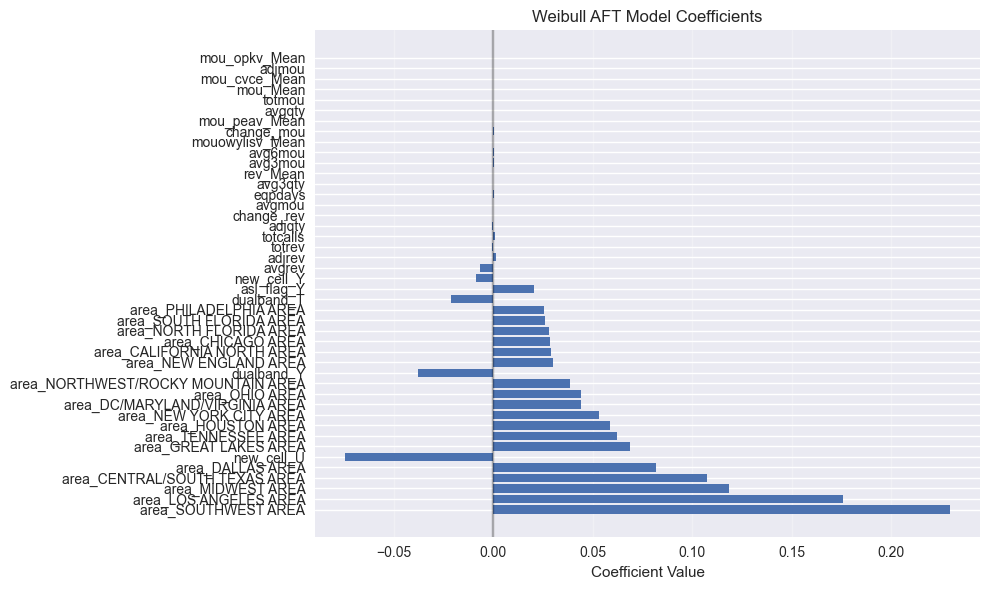

Model coefficients plot saved to 'figures/model_coefficients.png'


In [127]:
# Interpret the coefficients of the Weibull model
waft_summary = waft.summary

# Sort by absolute value of coef to identify most influential factors
waft_summary['abs_coef'] = waft_summary['coef'].abs()
waft_summary = waft_summary.sort_values('abs_coef', ascending=False)

# Display sorted coefficients
print("Sorted Model Coefficients by Influence Magnitude:")
display(waft_summary[['coef', 'exp(coef)', 'p']])

# Save sorted coefficients to CSV
waft_summary[['coef', 'exp(coef)', 'p', 'abs_coef']].to_csv('sorted_coefficients.csv')

# Visualize coefficient effects
plt.figure(figsize=(10, 6))
coefs = waft_summary['coef']
exp_coefs = waft_summary['exp(coef)']
variables = coefs.index.get_level_values(1)

# Removing the intercept for better visualization
mask = variables != 'Intercept'
coefs = coefs[mask]
exp_coefs = exp_coefs[mask]
variables = variables[mask]

plt.barh(variables, coefs)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title('Weibull AFT Model Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/model_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Model coefficients plot saved to 'figures/model_coefficients.png'")

Sorted Model Coefficients by Influence Magnitude (Log-Logistic):


coef  exp(coef)              p
param  covariate                                                             
alpha_ Intercept                           2.795903  16.377419   0.000000e+00
beta_  Intercept                           1.926064   6.862447   0.000000e+00
alpha_ area_LOS ANGELES AREA               0.082717   1.086234   1.649452e-50
       area_MIDWEST AREA                   0.050825   1.052139   1.006645e-20
       area_CENTRAL/SOUTH TEXAS AREA       0.047710   1.048866   5.055446e-15
       area_HOUSTON AREA                   0.041060   1.041915   8.523814e-12
       area_SOUTHWEST AREA                 0.040767   1.041610   9.228467e-14
       area_DALLAS AREA                    0.038974   1.039744   3.280348e-12
       area_TENNESSEE AREA                 0.036798   1.037484   1.471102e-07
       new_cell_U                         -0.035236   0.965378   5.209580e-34
       area_DC/MARYLAND/VIRGINIA AREA      0.032330   1.032858   1.432098e-09
       area_GREAT LAKES AREA               0.030927   1.031410   1.149420e-07
       area_NEW YORK CITY AREA             0.030837   1.031317   1.010005e-10
       area_OHIO AREA                      0.025051   1.025367   1.874341e-05
       area_SOUTH FLORIDA AREA             0.022079   1.022325   5.513201e-04
       dualband_T                         -0.021408   0.978819   1.759374e-04
       asl_flag_Y                         -0.020195   0.980007   5.849028e-10
       area_NEW ENGLAND AREA               0.019382   1.019571   4.087115e-04
       dualband_Y                         -0.019246   0.980938   3.375638e-16
       area_CALIFORNIA NORTH AREA          0.017735   1.017893   1.017815e-03
       area_NORTH FLORIDA AREA             0.017553   1.017707   2.782239e-03
       area_PHILADELPHIA AREA              0.014861   1.014971   3.500222e-02
       avgrev                             -0.010587   0.989469   0.000000e+00
       area_CHICAGO AREA                   0.010205   1.010257   6.765876e-02
       area_NORTHWEST/ROCKY MOUNTAIN AREA  0.008886   1.008926   1.263336e-01
       new_cell_Y                          0.002891   1.002895   3.944042e-01
       adjrev                              0.001655   1.001657   0.000000e+00
       rev_Mean                           -0.000873   0.999128   3.091477e-66
       totrev                             -0.000797   0.999203  4.719969e-279
       adjqty                             -0.000619   0.999381   0.000000e+00
       totcalls                            0.000612   1.000613   0.000000e+00
       eqpdays                             0.000293   1.000293   0.000000e+00
       avgqty                              0.000195   1.000195   1.590699e-07
       avg6mou                             0.000168   1.000168   1.048921e-55
       change_rev                         -0.000148   0.999852   7.308337e-06
       avgmou                             -0.000118   0.999882   9.200243e-14
       mou_peav_Mean                       0.000085   1.000085   7.829403e-11
       avg3qty                             0.000082   1.000082   4.381661e-04
       change_mou                          0.000078   1.000078   1.262116e-38
       mou_opkv_Mean                       0.000075   1.000075   4.254066e-09
       mouowylisv_Mean                    -0.000035   0.999965   2.365595e-01
       mou_Mean                            0.000026   1.000026   2.762503e-02
       totmou                             -0.000020   0.999980  1.006260e-111
       mou_cvce_Mean                      -0.000015   0.999985   2.599245e-01

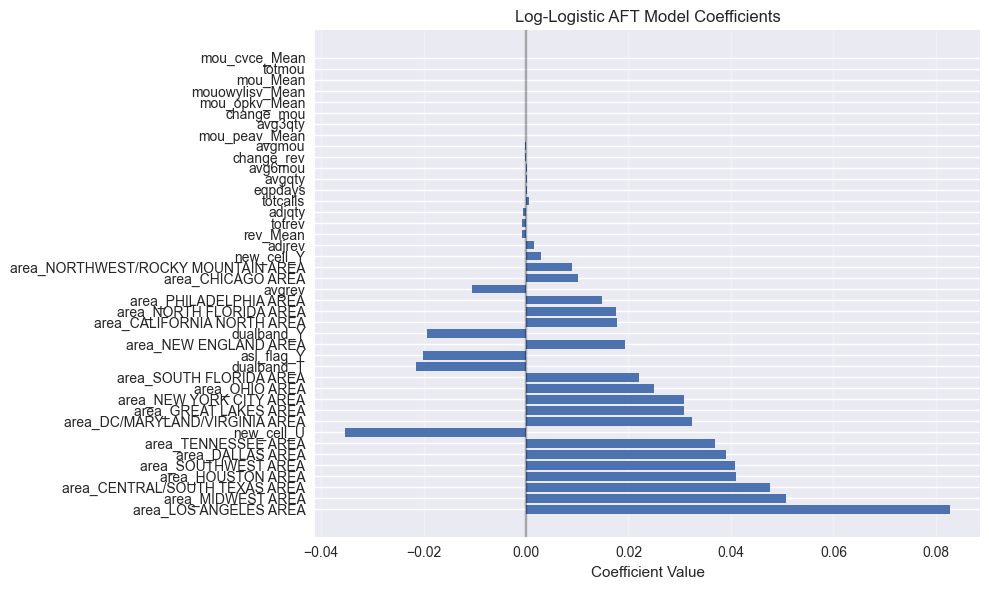

Model coefficients plot saved to 'figures/loglogistic_model_coefficients.png'


In [ ]:
# Interpret the coefficients of the Log-Logistic model
llaft_summary = llaft.summary

# Sort by absolute value of coef to identify most influential factors
llaft_summary['abs_coef'] = llaft_summary['coef'].abs()
llaft_summary = llaft_summary.sort_values('abs_coef', ascending=False)

# Display sorted coefficients
print("Sorted Model Coefficients by Influence Magnitude (Log-Logistic):")
display(llaft_summary[['coef', 'exp(coef)', 'p']])

# Save sorted coefficients to CSV
llaft_summary[['coef', 'exp(coef)', 'p', 'abs_coef']].to_csv('sorted_loglogistic_coefficients.csv')

# Visualize coefficient effects
plt.figure(figsize=(10, 6))
coefs = llaft_summary['coef']
exp_coefs = llaft_summary['exp(coef)']
variables = coefs.index.get_level_values(1)

# Removing the intercept for better visualization
mask = variables != 'Intercept'
coefs = coefs[mask]
exp_coefs = exp_coefs[mask]
variables = variables[mask]

plt.barh(variables, coefs)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title('Log-Logistic AFT Model Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/loglogistic_model_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Model coefficients plot saved to 'figures/loglogistic_model_coefficients.png'")


Top Influential Factors (Log-Logistic):


coef  exp(coef)             p
param  covariate                                                       
alpha_ Intercept                      2.795903  16.377419  0.000000e+00
beta_  Intercept                      1.926064   6.862447  0.000000e+00
alpha_ area_LOS ANGELES AREA          0.082717   1.086234  1.649452e-50
       area_MIDWEST AREA              0.050825   1.052139  1.006645e-20
       area_CENTRAL/SOUTH TEXAS AREA  0.047710   1.048866  5.055446e-15
       area_HOUSTON AREA              0.041060   1.041915  8.523814e-12
       area_SOUTHWEST AREA            0.040767   1.041610  9.228467e-14
       area_DALLAS AREA               0.038974   1.039744  3.280348e-12
       area_TENNESSEE AREA            0.036798   1.037484  1.471102e-07
       new_cell_U                    -0.035236   0.965378  5.209580e-34

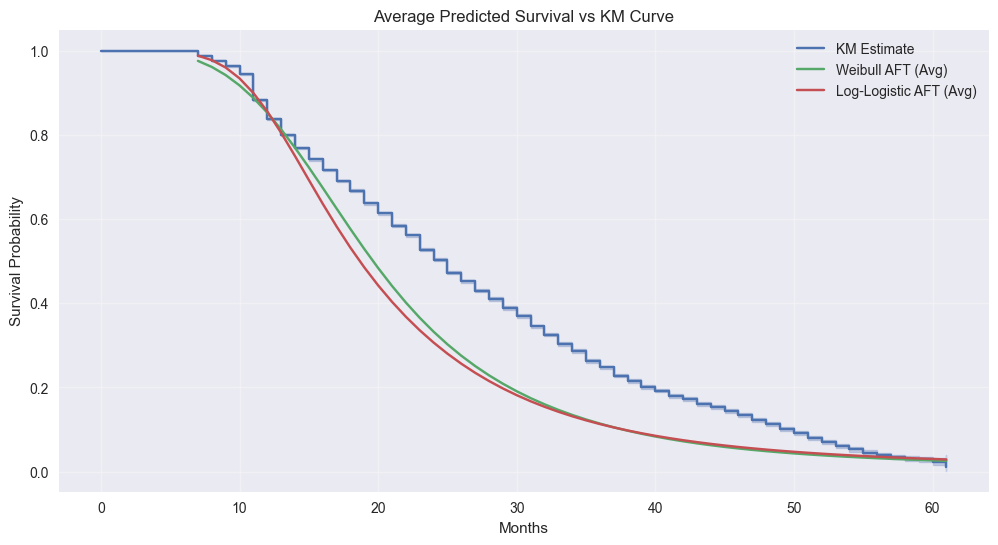

In [ ]:
# Interpret Log-Logistic model's top factors
top_factors = llaft_summary.copy()
top_factors['abs_coef'] = top_factors['coef'].abs()
top_factors = top_factors.sort_values('abs_coef', ascending=False)

print("Top Influential Factors (Log-Logistic):")
display(top_factors[['coef', 'exp(coef)', 'p']].head(10))

# Plot average survival across all customers
avg_surv_ll = llaft.predict_survival_function(model_df).mean(axis=1)
avg_surv_wa = waft.predict_survival_function(model_df).mean(axis=1)

plt.figure(figsize=(12, 6))
kmf.plot_survival_function()
plt.plot(avg_surv_wa.index, avg_surv_wa, label='Weibull AFT (Avg)')
plt.plot(avg_surv_ll.index, avg_surv_ll, label='Log-Logistic AFT (Avg)')
plt.title('Average Predicted Survival vs KM Curve')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



# COXPH


c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


coef  exp(coef)  se(coef)  \
covariate                                                           
totmou                             -0.000007   0.999993  0.000003   
totrev                              0.000904   1.000905  0.000095   
avgrev                              0.007855   1.007885  0.000438   
avgmou                              0.000948   1.000949  0.000075   
rev_Mean                            0.001086   1.001086  0.000187   
mou_Mean                           -0.000144   0.999856  0.000046   
change_mou                         -0.000126   0.999874  0.000027   
change_rev                          0.000357   1.000357  0.000108   
mou_cvce_Mean                      -0.000015   0.999985  0.000063   
mouowylisv_Mean                     0.000027   1.000027  0.000138   
mou_peav_Mean                      -0.000029   0.999971  0.000057   
mou_opkv_Mean                      -0.000103   0.999897  0.000060   
totcalls                           -0.000629   0.999371  0.000061   
adjrev                             -0.001414   0.998587  0.000097   
adjqty                              0.000669   1.000669  0.000060   
avgqty                             -0.001445   0.998556  0.000161   
avg3qty                             0.000134   1.000134  0.000089   
avg6mou                            -0.000173   0.999827  0.000042   
eqpdays                            -0.000209   0.999791  0.000017   
area_CALIFORNIA NORTH AREA         -0.054509   0.946950  0.028347   
area_CENTRAL/SOUTH TEXAS AREA      -0.100333   0.904537  0.030156   
area_CHICAGO AREA                  -0.026979   0.973381  0.030976   
area_DALLAS AREA                   -0.082432   0.920874  0.028411   
area_DC/MARYLAND/VIRGINIA AREA     -0.072138   0.930402  0.029085   
area_GREAT LAKES AREA              -0.074229   0.928459  0.030632   
area_HOUSTON AREA                  -0.090479   0.913493  0.031321   
area_LOS ANGELES AREA              -0.188540   0.828167  0.028266   
area_MIDWEST AREA                  -0.097619   0.906995  0.028046   
area_NEW ENGLAND AREA              -0.043580   0.957356  0.029429   
area_NEW YORK CITY AREA            -0.060212   0.941565  0.025669   
area_NORTH FLORIDA AREA            -0.035611   0.965015  0.031806   
area_NORTHWEST/ROCKY MOUNTAIN AREA -0.026022   0.974313  0.030101   
area_OHIO AREA                     -0.067194   0.935014  0.031342   
area_PHILADELPHIA AREA             -0.022466   0.977785  0.036881   
area_SOUTH FLORIDA AREA            -0.046255   0.954799  0.032099   
area_SOUTHWEST AREA                -0.151324   0.859569  0.028367   
area_TENNESSEE AREA                -0.085836   0.917745  0.035196   
new_cell_U                          0.065147   1.067316  0.012951   
new_cell_Y                         -0.002813   0.997191  0.014588   
asl_flag_Y                          0.108481   1.114584  0.019115   
dualband_T                          0.023503   1.023781  0.028354   
dualband_Y                          0.011337   1.011401  0.011148   

                                    coef lower 95%  coef upper 95%  \
covariate                                                            
totmou                                   -0.000013       -0.000001   
totrev                                    0.000719        0.001090   
avgrev                                    0.006996        0.008713   
avgmou                                    0.000801        0.001095   
rev_Mean                                  0.000719        0.001453   
mou_Mean                                 -0.000234       -0.000055   
change_mou                               -0.000180       -0.000073   
change_rev                                0.000146        0.000569   
mou_cvce_Mean                            -0.000139        0.000108   
mouowylisv_Mean                          -0.000243        0.000298   
mou_peav_Mean                            -0.000140        0.000082   
mou_opkv_Mean                            -0.000220        0.000014   
totcalls               

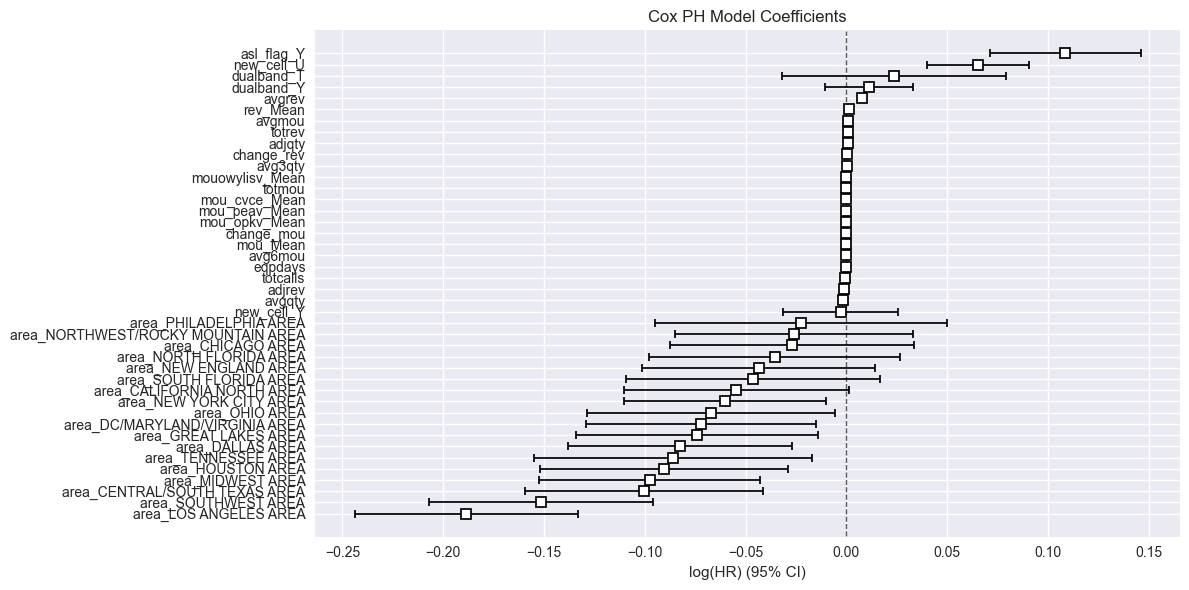

In [ ]:
from lifelines import CoxPHFitter
import pandas as pd

# 3. Fit Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit model on duration and event indicator columns: 'months' and 'churn'
cph.fit(model_df, duration_col='months', event_col='churn')

# 4. Print summary
display(cph.summary)

# cph.summary.to_csv('coxph_model_summary.csv')

# 5. Plot the coefficients 
cph.plot()
plt.title('Cox PH Model Coefficients')
plt.tight_layout()
plt.show()

# Cluster Analysis

In [ ]:
clusterdata = pd.read_csv('churn_data_clustered_sample.csv')
clusterdata



rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0      23.9975    219.25        22.50   0.2475         0.00       0.0000   
1      16.9900     10.25        16.99   0.0000         0.00       0.0000   
2      38.0000      7.50        38.00   0.0000         0.00       0.0000   
3      55.2300    570.50        71.98   0.0000         0.00       0.0000   
4      82.2750   1312.25        75.00   1.2375         0.00       0.0000   
...        ...       ...          ...      ...          ...          ...   
4995   36.9800    731.25        46.98   0.0000         0.00       0.0000   
4996   31.1175     29.25        32.49   0.2475         0.00       0.0000   
4997   61.6625    462.00        50.00   2.4750        23.75       5.9375   
4998   16.7775      9.25        16.99   0.2475         1.00       0.3900   
4999   20.0175     20.50        19.99   0.2475         2.00       0.7800   

      vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...   mail  phoneswap  \
0          0.0000          0.0        0.0     -157.25  ...  False       True   
1          0.0000          0.0        0.0       -4.25  ...  False       True   
2          0.0000          0.0        0.0       -1.50  ...  False      False   
3          0.0000          0.0        0.0       38.50  ...  False       True   
4          0.0000          0.0        0.0      156.75  ...  False       True   
...           ...          ...        ...         ...  ...    ...        ...   
4995       0.0000          0.0        0.0      -82.25  ...  False      False   
4996       0.0000          0.0        0.0       26.75  ...  False      False   
4997       5.9375          0.0        0.0      -47.00  ...  False      False   
4998       0.3900          0.0        0.0        4.75  ...  False       True   
4999       0.7800          0.0        0.0       -0.50  ...  False      False   

      retentioncall  acptcall  referrals  pcowner_binary  women  \
0              True      True      False            True  False   
1             False     False      False            True  False   
2             False     False      False           False  False   
3             False     False      False            True  False   
4             False     False      False           False  False   
...             ...       ...        ...             ...    ...   
4995          False     False      False            True  False   
4996          False     False      False           False  False   
4997          False     False      False           False  False   
4998          False     False      False            True  False   
4999          False     False      False            True   True   

      mailordr_binary  mailresp_binary  Cluster  
0                True             True        2  
1                True             True        2  
2               False            False        2  
3               False            False        1  
4                True             True        0  
...               ...              ...      ...  
4995            False            False        1  
4996            False            False        2  
4997            False            False        2  
4998             True             True        2  
4999             True             True        2  

[5000 rows x 109 columns]

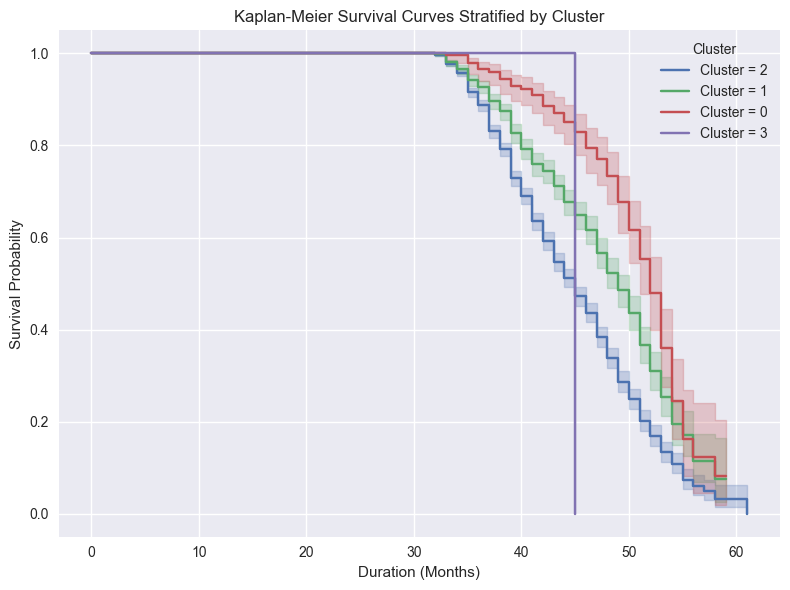

In [ ]:


df = clusterdata

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Define duration and event columns
duration_col = 'months'
event_col = 'churn'

# Define categorical stratification variables
stratification_vars = ['Cluster']

# Plot KMF curves stratified by each variable
for var in stratification_vars:
    plt.figure(figsize=(8, 6))
    for level in df[var].dropna().unique():
        mask = df[var] == level
        kmf.fit(df.loc[mask, duration_col], df.loc[mask, event_col], label=f"{var} = {level}")
        kmf.plot_survival_function(ci_show=True)
    
    plt.title(f"Kaplan-Meier Survival Curves Stratified by {var}")
    plt.xlabel("Duration (Months)")
    plt.ylabel("Survival Probability")
    plt.legend(title=var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
